## Import Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline





df = pd.read_csv('/Users/sauravraj/Saurav codes/Coding/Stock Prediction/stock_price.csv')
def convert_volume(volume_str):
    if 'M' in volume_str:
        return float(volume_str.replace('M', '')) * 1_000_000
    elif 'B' in volume_str:
        return float(volume_str.replace('B', '')) * 1_000_000_000
    else:
        return float(volume_str)  # In case there's no suffix

# Apply the function to the 'Volume' column


df.rename(columns={
    '日付け': 'Date',
    '終値': 'Close',
    '始値': 'Open',
    '高値': 'High',
    '安値': 'Low',
    '出来高': 'Volume',
    '変化率 %': 'Change Rate %'
}, inplace=True)
df['Volume'] = df['Volume'].apply(convert_volume)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Change Rate %'] = df['Change Rate %'].str.replace('%', '').astype(float)






### **Inspect the Data**

In [4]:

# View the first few rows
print(df.head())

# Get a summary of the DataFrame
print(df.info())

# Get statistical summary
print(df.describe())

            Close   Open   High    Low       Volume  Change Rate %
Date                                                              
2024-08-01  156.3  159.3  159.4  156.1   79150000.0          -2.56
2024-07-31  160.4  158.2  160.7  158.1  173910000.0           1.07
2024-07-30  158.7  158.8  159.2  158.0  138140000.0          -0.63
2024-07-29  159.7  158.7  160.2  158.4  126280000.0           1.14
2024-07-26  157.9  159.3  159.6  157.9  155080000.0          -0.13
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9202 entries, 2024-08-01 to 1987-02-12
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close          9202 non-null   float64
 1   Open           9202 non-null   float64
 2   High           9202 non-null   float64
 3   Low            9202 non-null   float64
 4   Volume         9202 non-null   float64
 5   Change Rate %  9202 non-null   float64
dtypes: float64(6)
memory usage: 503.2 KB
None
        

## Exploratory Data Analysis (EDA)

In [6]:
# Calculate daily price change
df['Price_Change'] = df['Close'] - df['Open']

# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Calculate volatility (standard deviation of daily returns)
volatility = df['Daily_Return'].std() * np.sqrt(252)  # Annualized volatility
print(f'Annualized Volatility: {volatility:.2%}')

Annualized Volatility: 29.54%


## Plotting Daily Price Change and Returns

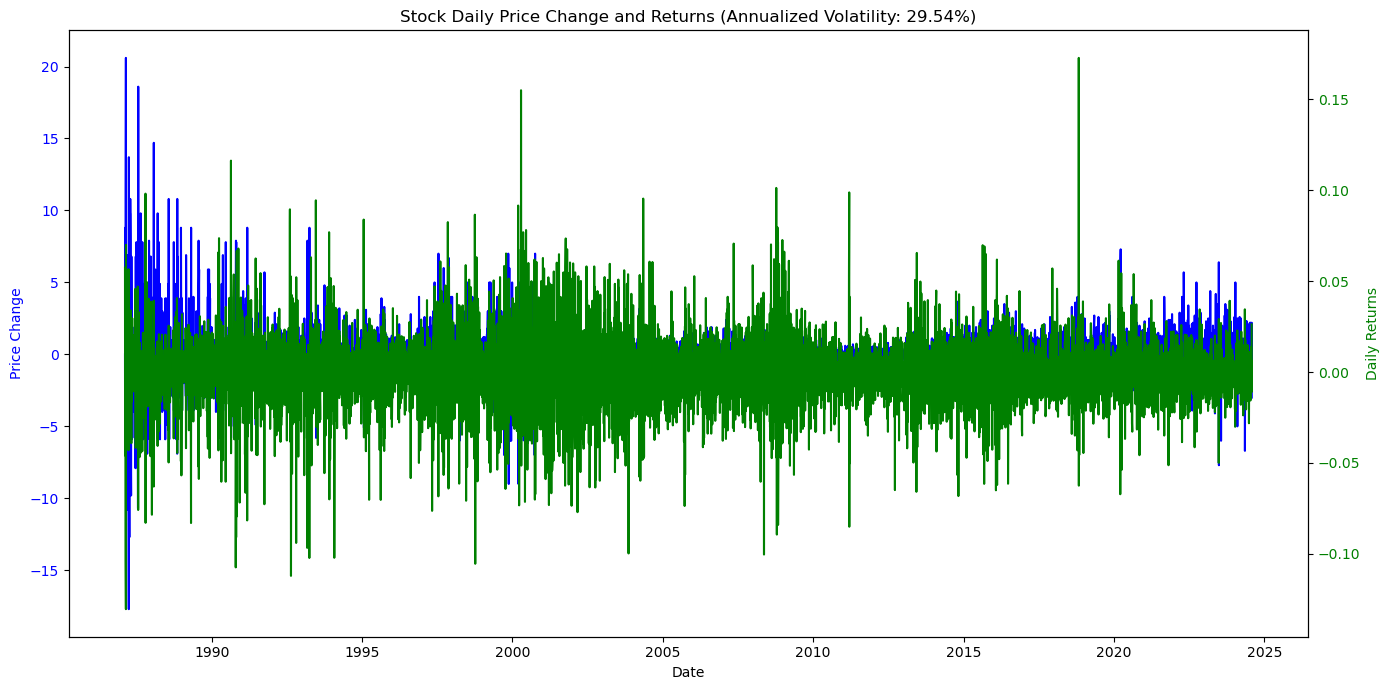

In [8]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the daily price change on the first y-axis
ax1.plot(df.index, df['Price_Change'], color='blue', label='Daily Price Change')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price Change', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot daily returns
ax2 = ax1.twinx()
ax2.plot(df.index, df['Daily_Return'], color='green', label='Daily Returns')
ax2.set_ylabel('Daily Returns', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Adding annualized volatility to the plot title
plt.title(f'Stock Daily Price Change and Returns (Annualized Volatility: {volatility:.2%})')

# Adjust layout and display the plot
fig.tight_layout()
plt.show()

## Plotting Closing Price Over Time

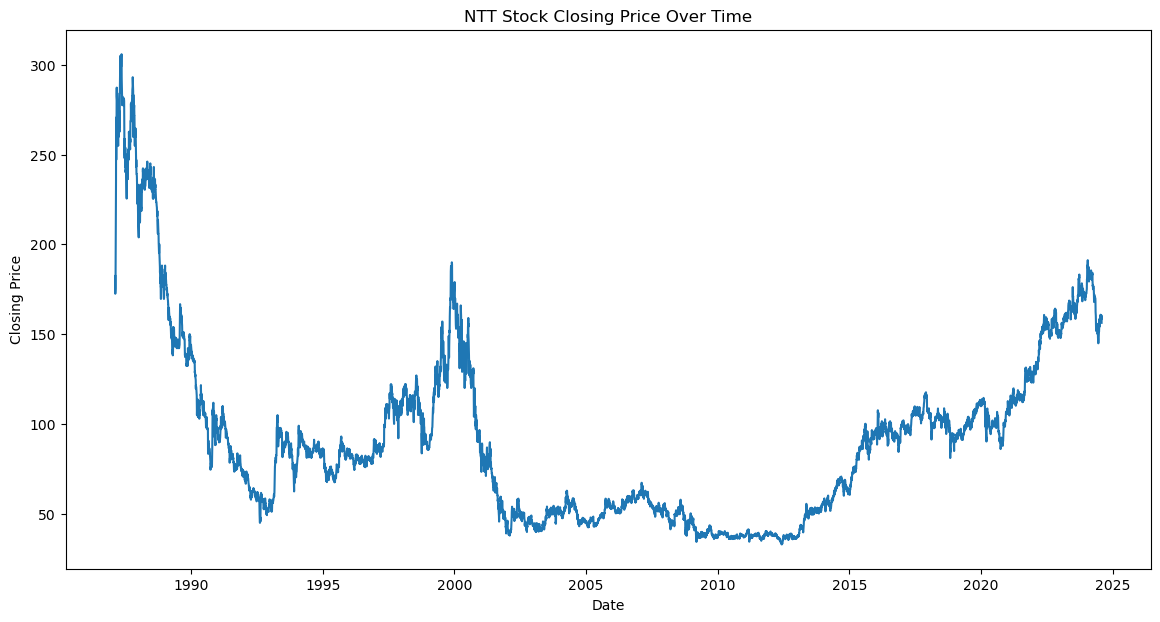

In [10]:
# Plot the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title('NTT Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

## Plotting Closing and High Prices

#### We plot both the closing and high prices on a dual-axis chart to compare their movements.

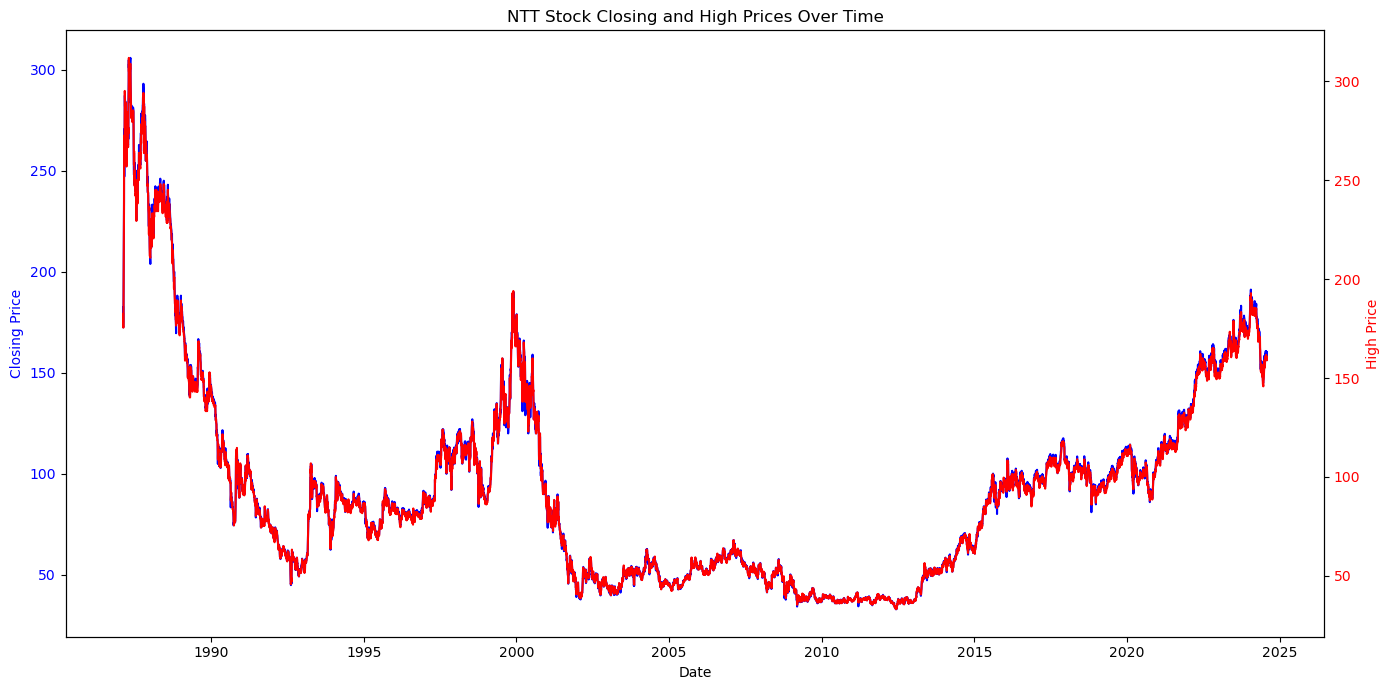

In [13]:
#  Plot the closing price over time
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the 'Close' prices on the first y-axis
ax1.plot(df.index, df['Close'], color='blue', label='Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the 'High' prices on the second y-axis
ax2.plot(df.index, df['High'], color='red', label='High Price')
ax2.set_ylabel('High Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and show the plot
plt.title('NTT Stock Closing and High Prices Over Time')
fig.tight_layout()  # Adjust the layout to prevent label overlap
plt.show()

## Plotting Moving Averages

#### We calculate and plot the 20-day and 50-day simple moving averages alongside the closing price to identify trends.

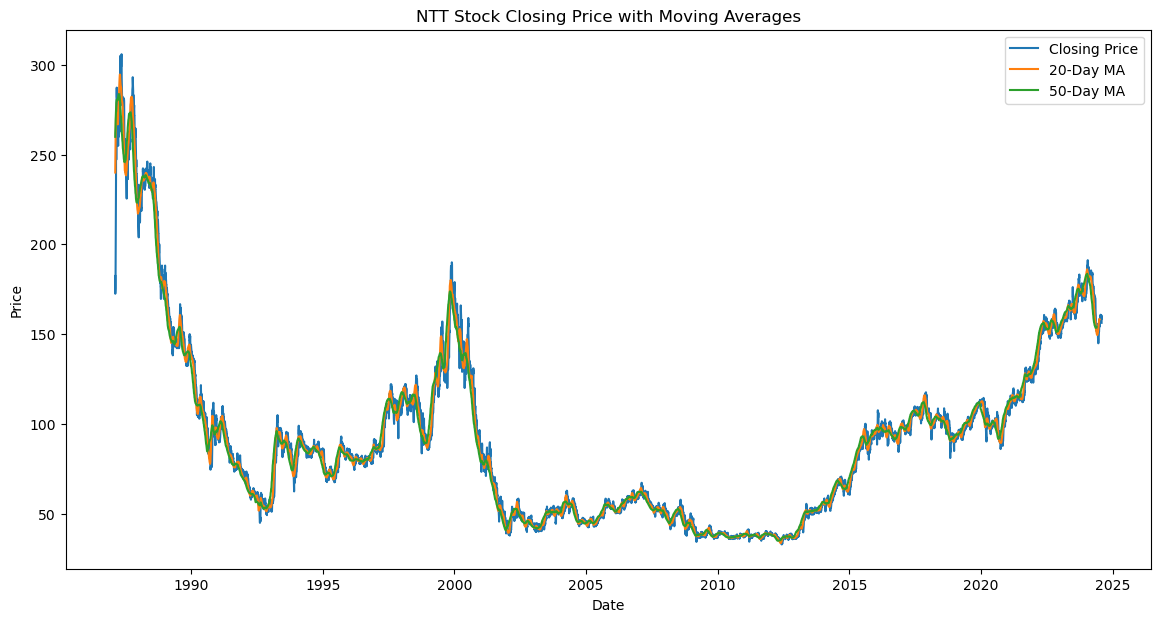

In [16]:
# Calculate moving averages
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

# Plot closing price with moving averages
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price')
plt.plot(df['MA20'], label='20-Day MA')
plt.plot(df['MA50'], label='50-Day MA')
plt.title('NTT Stock Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Time Series Decomposition

#### We resample the closing price to a monthly frequency and perform an additive seasonal decomposition to identify trend, seasonality, and residuals.

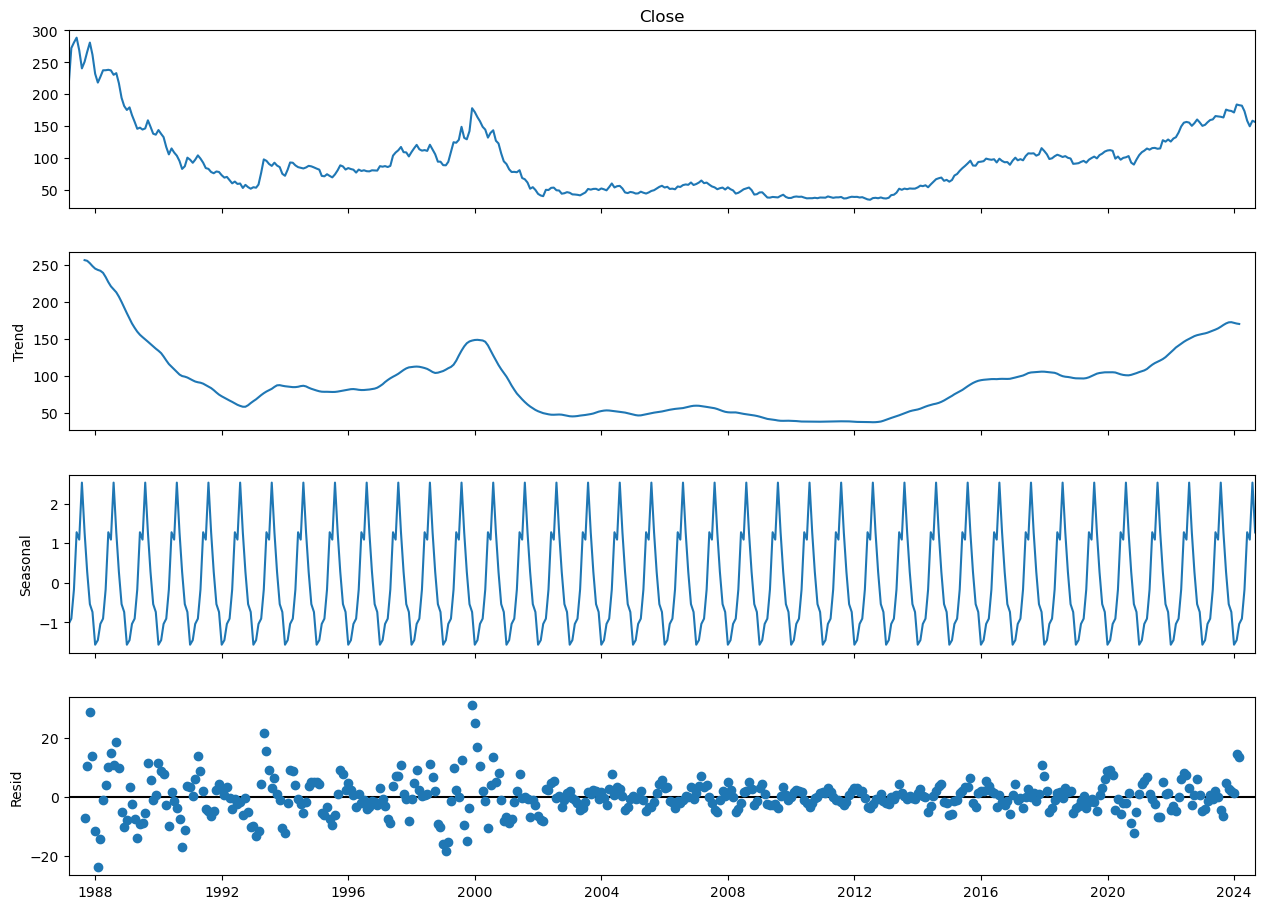

In [19]:
# Resample data to monthly frequency and take the mean
df_monthly = df['Close'].resample('ME').mean()

# Decompose the time series
decomposition = seasonal_decompose(df_monthly, model='additive')
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

## Autocorrelation and Partial Autocorrelation

#### We plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) to understand the serial dependencies in the closing price.

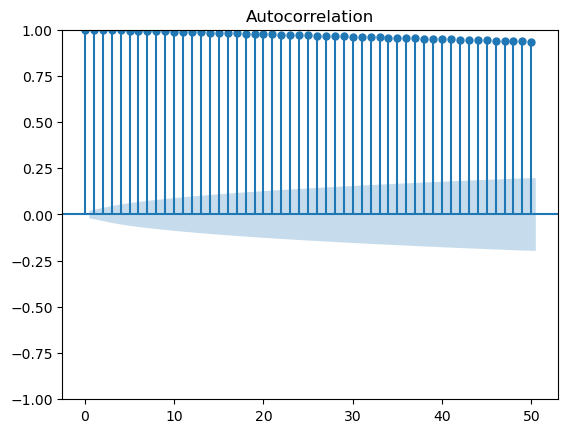

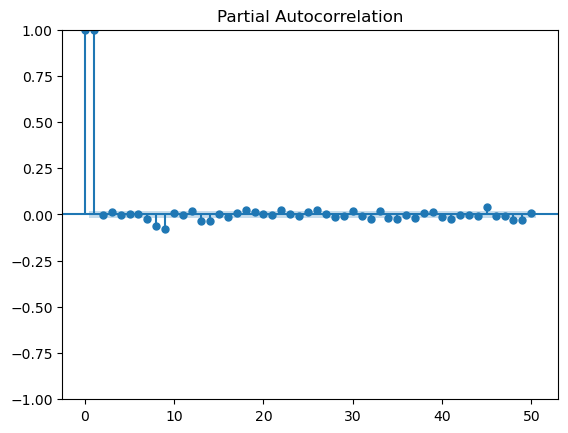

In [22]:
# Plot Autocorrelation Function (ACF)
plot_acf(df['Close'].dropna(), lags=50)
plt.show()

# Plot Partial Autocorrelation Function (PACF)
plot_pacf(df['Close'].dropna(), lags=50)
plt.show()

## Box Plots for Closing Price and Volume

#### Box plots help identify the distribution and potential outliers in the closing price and trading volume.

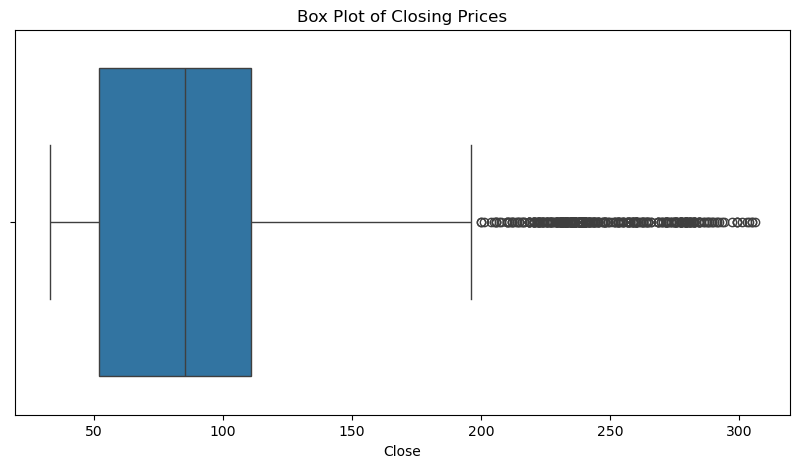

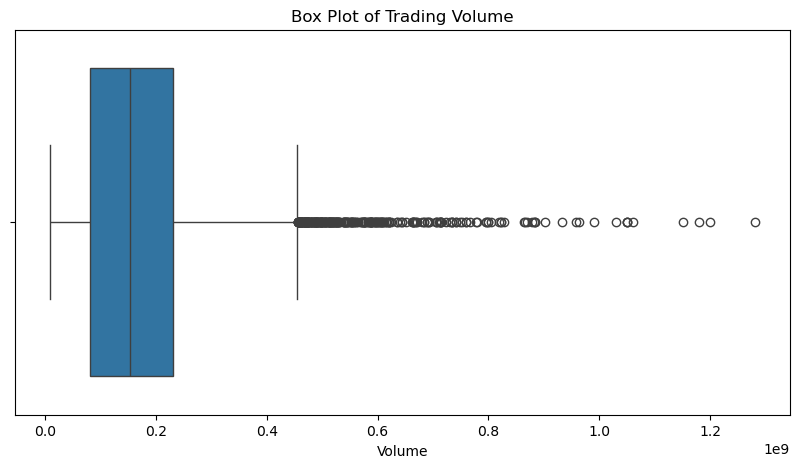

In [25]:
# Box plot for closing price
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Close'])
plt.title('Box Plot of Closing Prices')
plt.show()

# Box plot for trading volume
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Volume'])
plt.title('Box Plot of Trading Volume')
plt.show()

# Feature Engineering

#### We enhance the dataset by creating new features such as lagged variables, moving averages, and technical indicators like RSI, MACD, and Bollinger Bands.


## Handling Outliers

#### We identify and visualize outliers in the closing price using Z-scores

Number of outliers detected: 177


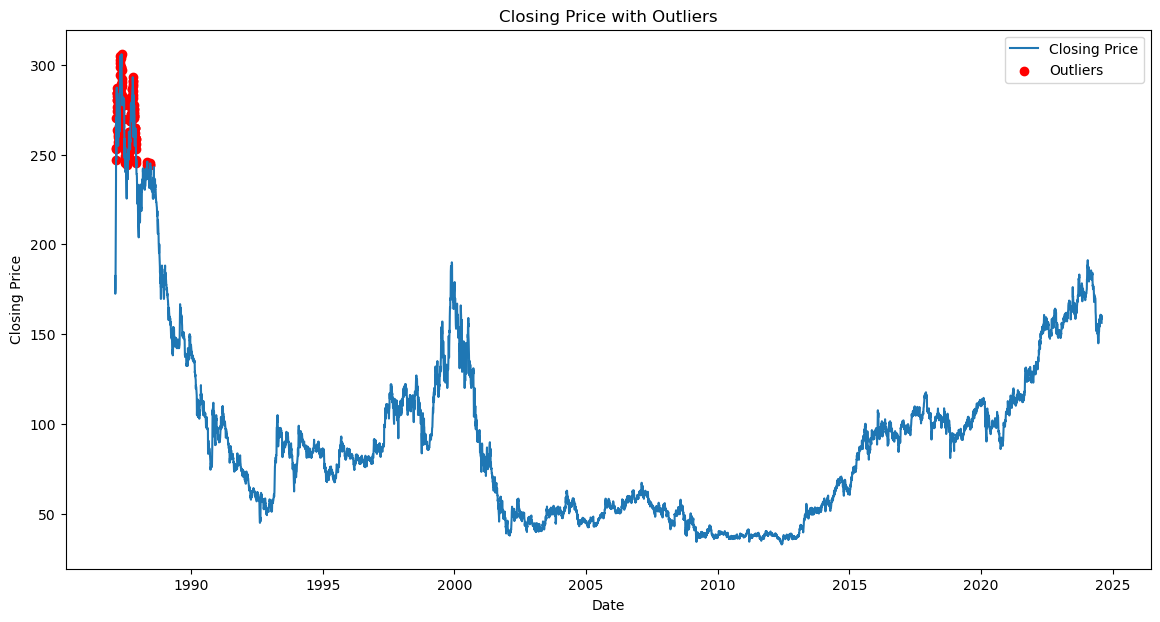

In [30]:
# Identify outliers using z-score
from scipy import stats

df['Close_ZScore'] = np.abs(stats.zscore(df['Close']))
outliers = df[df['Close_ZScore'] > 3]  # Z-score threshold
print(f'Number of outliers detected: {outliers.shape[0]}')

# Plot outliers on closing price
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price')
plt.scatter(outliers.index, outliers['Close'], color='red', label='Outliers')
plt.title('Closing Price with Outliers')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## Trading Volume Over Time

#### Visualizing trading volume to understand its trend and variability over time.

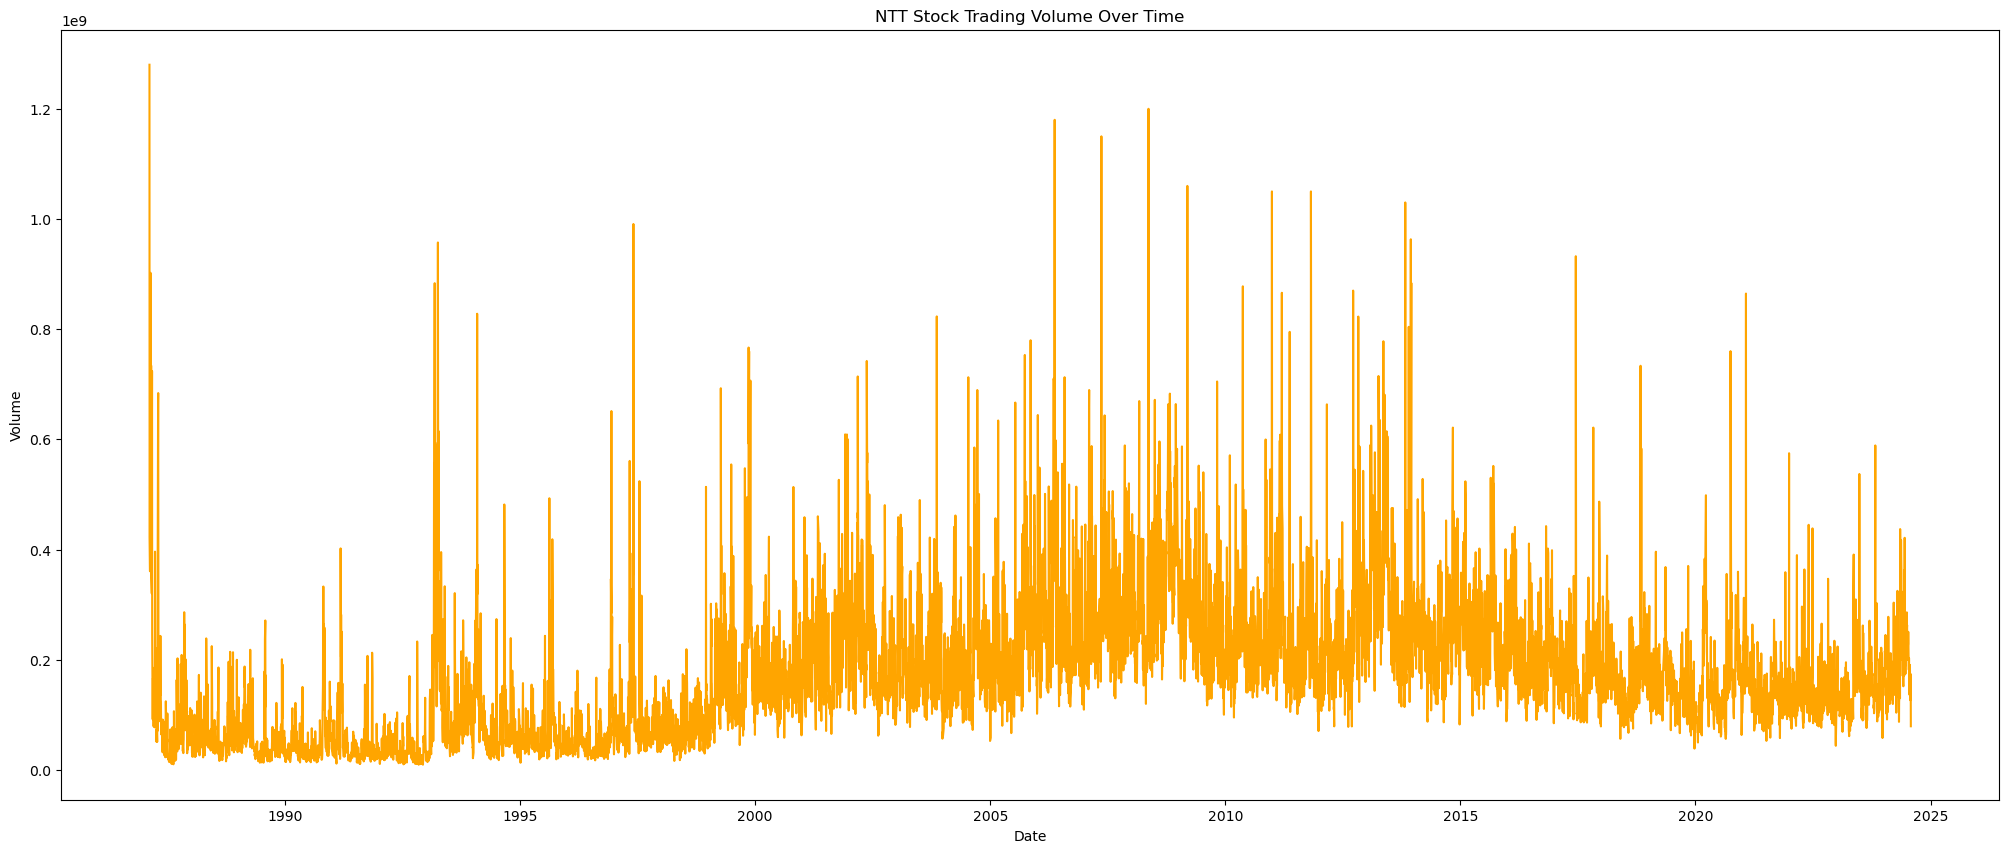

In [33]:
# Plot trading volume over time
plt.figure(figsize=(25, 10))
plt.plot(df['Volume'], color='orange')
plt.title('NTT Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

## Correlation Between Volume and Closing Price

#### We calculate and visualize the correlation between trading volume and closing price to assess their relationship

Correlation between Closing Price and Volume: -0.32


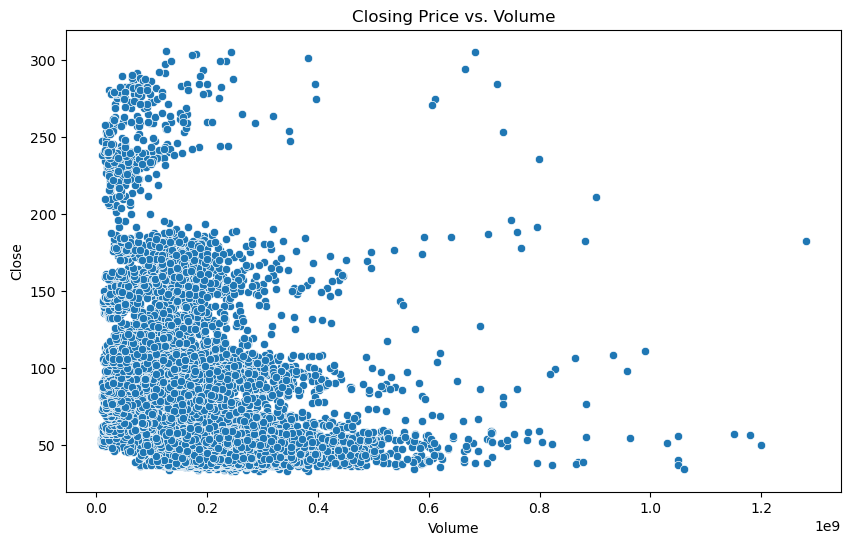

In [36]:
# Calculate correlation between volume and closing price
correlation = df['Close'].corr(df['Volume'])
print(f'Correlation between Closing Price and Volume: {correlation:.2f}')

# Scatter plot of closing price vs. volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume', y='Close', data=df)
plt.title('Closing Price vs. Volume')
plt.show()

In [37]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from ta.momentum import RSIIndicator
from ta.trend import MACD
from ta.volatility import BollingerBands

# For date and time features
import holidays

## Handling Missing Values

#### We check for missing values and handle them using interpolation, forward fill, and backward fill methods.

In [40]:
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Option 1: Interpolation (for time series data)
df.interpolate(method='time', inplace=True)

# Option 2: Forward Fill
df.fillna(method='ffill', inplace=True)

# Option 3: Backward Fill
df.fillna(method='bfill', inplace=True)

# Verify missing values are handled
print("Missing values after handling:")
print(df.isnull().sum())

Missing values before handling:
Close             0
Open              0
High              0
Low               0
Volume            0
Change Rate %     0
Price_Change      0
Daily_Return      1
MA20             19
MA50             49
Close_ZScore      0
dtype: int64
Missing values after handling:
Close            0
Open             0
High             0
Low              0
Volume           0
Change Rate %    0
Price_Change     0
Daily_Return     0
MA20             0
MA50             0
Close_ZScore     0
dtype: int64


/var/folders/2x/ckr20lrj2zxfydcl8zw2mhqm0000gn/T/ipykernel_95031/2810497812.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/var/folders/2x/ckr20lrj2zxfydcl8zw2mhqm0000gn/T/ipykernel_95031/2810497812.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


## Scaling and Transformation

#### We normalize the numerical features using Min-Max Scaling and apply log transformation to the trading volume to address skewness.

In [43]:
# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Select features to scale
features_to_scale = ['Open', 'High', 'Low', 'Close', 'Volume']

# Apply Min-Max Scaling
df_scaled = df.copy()
df_scaled[features_to_scale] = min_max_scaler.fit_transform(df[features_to_scale])



### Log Transformation of Volume

#### We apply log transformation to the trading volume to reduce skewness

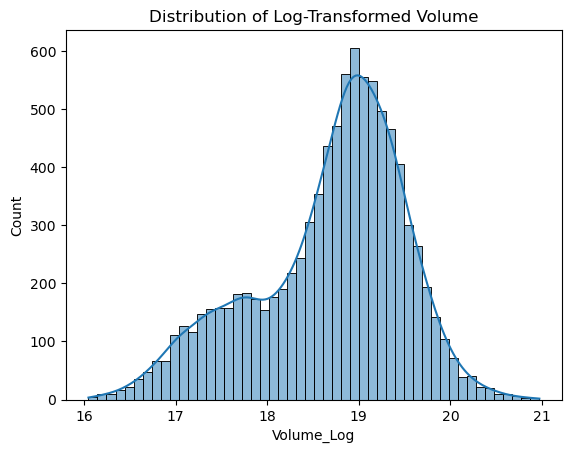

In [46]:
# Apply log transformation to Volume (if skewed)
df['Volume_Log'] = np.log1p(df['Volume'])

# Check the distribution after transformation
sns.histplot(df['Volume_Log'], kde=True)
plt.title('Distribution of Log-Transformed Volume')
plt.show()

## Time Features

#### We extract various time-based features from the ‘Date’ column to capture seasonal patterns and trends.

In [49]:
# Reset index if Date is the index
df.reset_index(inplace=True)

# Extract date features
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Year'] = df['Date'].dt.year
df['IsMonthStart'] = df['Date'].dt.is_month_start.astype(int)
df['IsMonthEnd'] = df['Date'].dt.is_month_end.astype(int)

# Add holiday indicator (for a specific country, e.g., Japan)
jp_holidays = holidays.Japan()
df['IsHoliday'] = df['Date'].isin(jp_holidays).astype(int)

# Set Date back as index if needed
df.set_index('Date', inplace=True)

## Lag Features

#### We create lagged features for the closing price and daily returns to capture temporal dependencies.

In [52]:
# Create lag features for closing price
df['Lag_1'] = df['Close'].shift(1)
df['Lag_2'] = df['Close'].shift(2)
df['Lag_3'] = df['Close'].shift(3)

# Create lag features for returns
df['Return'] = df['Close'].pct_change()
df['Return_Lag_1'] = df['Return'].shift(1)
df['Return_Lag_2'] = df['Return'].shift(2)
df['Return_Lag_3'] = df['Return'].shift(3)

# Technical Indicators






#### We compute technical indicators such as Simple Moving Averages (SMA), Exponential Moving Averages (EMA), Relative Strength Index (RSI), Moving Average Convergence Divergence (MACD), and Bollinger Bands.

## Simple and Exponential Moving Averages

In [56]:
# Simple Moving Averages
df['SMA_5'] = df['Close'].rolling(window=5).mean()
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['SMA_20'] = df['Close'].rolling(window=20).mean()

# Exponential Moving Averages
df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

### Plotting Moving Averages

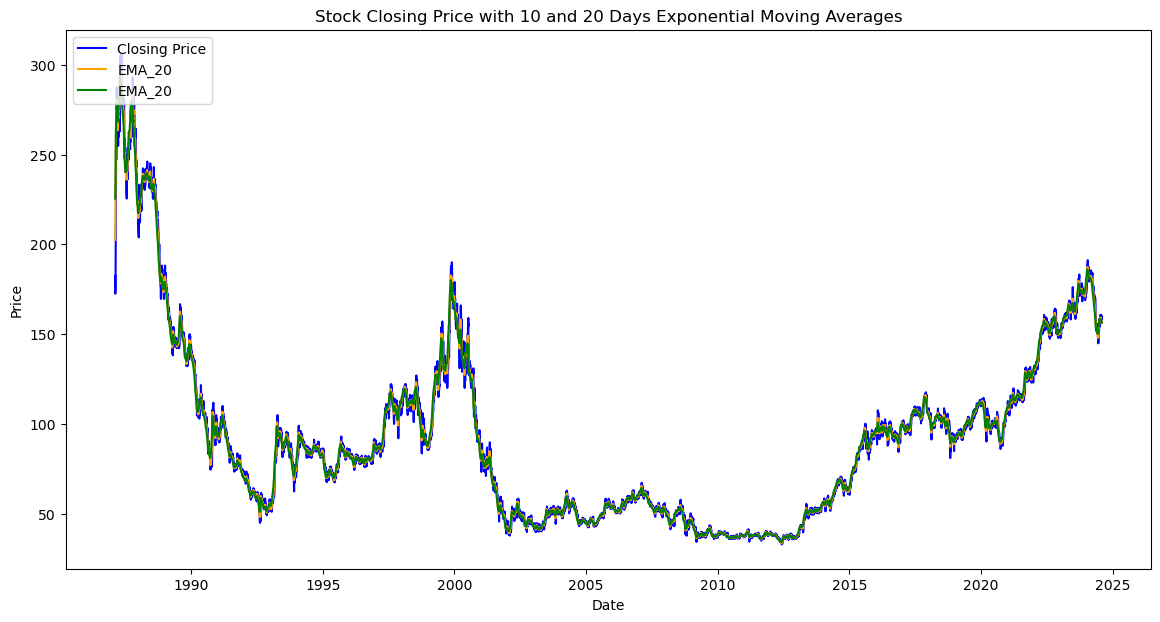

In [58]:
import matplotlib.pyplot as plt

# Plot Closing Price with Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.plot(df.index, df['EMA_10'], label='EMA_20', color='orange')
plt.plot(df.index, df['EMA_20'], label='EMA_20', color='green')

# Add title and labels
plt.title('Stock Closing Price with 10 and 20 Days Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')

# Show legend
plt.legend(loc='upper left')

# Display the plot
plt.show()

## Relative Strength Index (RSI)

In [60]:
# RSI using ta library
rsi_indicator = RSIIndicator(close=df['Close'], window=14)
df['RSI_14'] = rsi_indicator.rsi()

## Moving Average Convergence Divergence (MACD)

In [62]:
# MACD using ta library
macd_indicator = MACD(close=df['Close'], window_slow=26, window_fast=12, window_sign=9)
df['MACD'] = macd_indicator.macd()
df['MACD_Signal'] = macd_indicator.macd_signal()
df['MACD_Diff'] = macd_indicator.macd_diff()

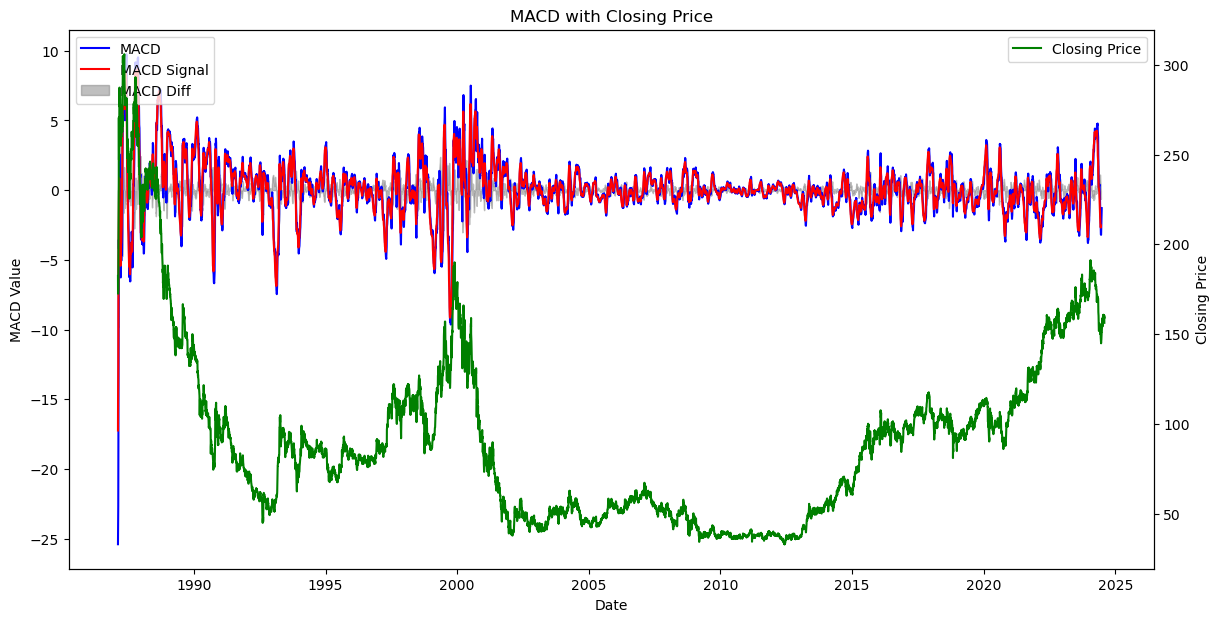

In [63]:
import matplotlib.pyplot as plt

# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the MACD, MACD Signal, and MACD Difference on the primary y-axis (ax1)
ax1.plot(df.index, df['MACD'], label='MACD', color='blue')
ax1.plot(df.index, df['MACD_Signal'], label='MACD Signal', color='red')
ax1.fill_between(df.index, df['MACD_Diff'], 0, alpha=0.5, label='MACD Diff', color='gray')

# Label and title for the MACD plot
ax1.set_title('MACD with Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('MACD Value')
ax1.legend(loc='upper left')

# Create a secondary y-axis (ax2) for the closing price
ax2 = ax1.twinx()
ax2.plot(df.index, df['Close'], label='Closing Price', color='green')
ax2.set_ylabel('Closing Price')

# Show the legend for the secondary axis
ax2.legend(loc='upper right')

# Display the plot
plt.show()

## Bollinger Bands

In [65]:
# Bollinger Bands using ta library
bb_indicator = BollingerBands(close=df['Close'], window=20, window_dev=2)
df['BB_High'] = bb_indicator.bollinger_hband()
df['BB_Low'] = bb_indicator.bollinger_lband()
df['BB_Width'] = df['BB_High'] - df['BB_Low']

# Feature Selection and Correlation

In [68]:
# If 'DayOfWeek' is considered categorical, apply one-hot encoding
df = pd.get_dummies(df, columns=['DayOfWeek'], drop_first=True)

# For any other categorical variables, apply similar encoding
# Example: Encoding 'IsHoliday' as category (though it's already binary)
# df['IsHoliday'] = df['IsHoliday'].astype('category')

### We analyze the correlation matrix to identify highly correlated features and prevent multicollinearity by dropping redundant features.

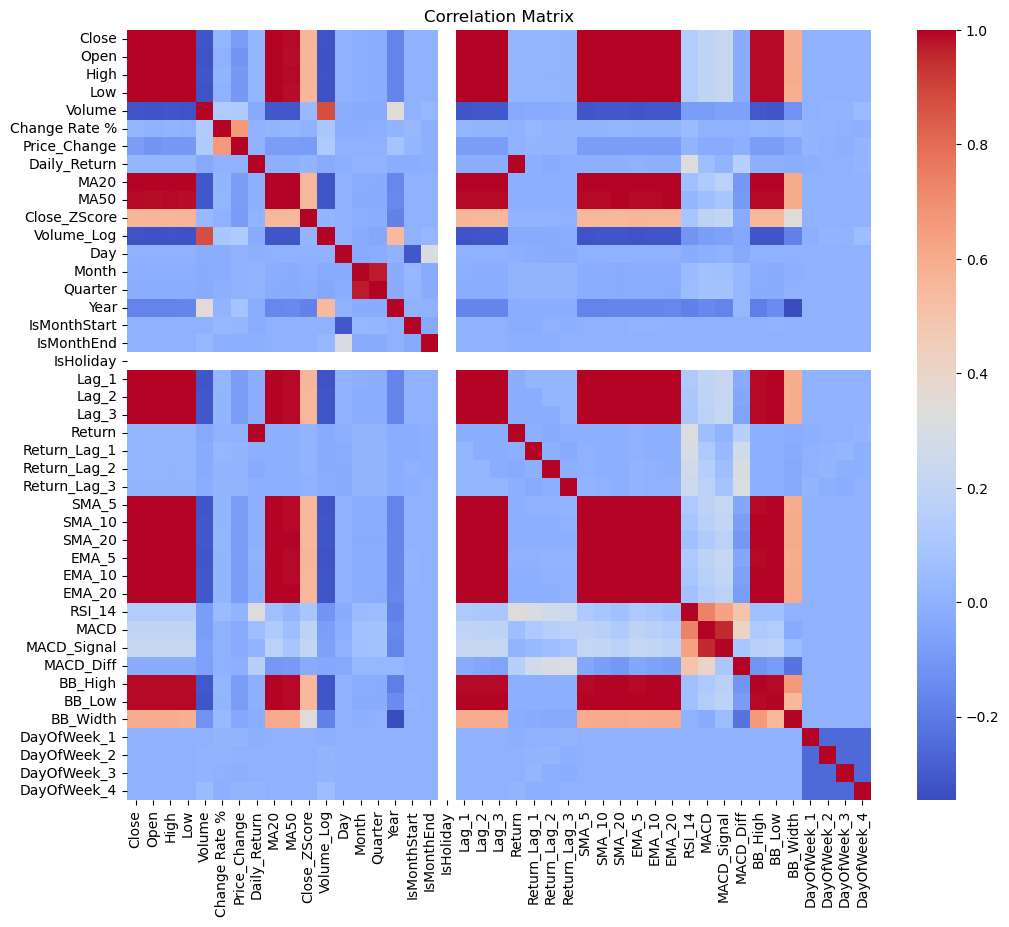

High correlation between Close and Open: 1.00
High correlation between Close and High: 1.00
High correlation between Close and Low: 1.00
High correlation between Close and MA20: 1.00
High correlation between Close and MA50: 0.99
High correlation between Close and Lag_1: 1.00
High correlation between Close and Lag_2: 1.00
High correlation between Close and Lag_3: 1.00
High correlation between Close and SMA_5: 1.00
High correlation between Close and SMA_10: 1.00
High correlation between Close and SMA_20: 1.00
High correlation between Close and EMA_5: 1.00
High correlation between Close and EMA_10: 1.00
High correlation between Close and EMA_20: 1.00
High correlation between Close and BB_High: 0.99
High correlation between Close and BB_Low: 0.99
High correlation between Open and Close: 1.00
High correlation between Open and High: 1.00
High correlation between Open and Low: 1.00
High correlation between Open and MA20: 1.00
High correlation between Open and MA50: 0.99
High correlation betwe

In [70]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Identify features with high correlation (threshold example: 0.9)
high_corr_pairs = []
threshold = 0.9
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and abs(corr_matrix.loc[i, j]) > threshold:
            high_corr_pairs.append((i, j))

            print(f"High correlation between {i} and {j}: {corr_matrix.loc[i, j]:.2f}")


# Drop one of the features in each pair to prevent multicollinearity
# Example:
df.drop(i, axis=1, inplace=True)  # If SMA_10 is highly correlated with SMA_5


### Feature Importance

          Feature    Importance
1            High  6.330917e-01
9    Close_ZScore  2.961932e-01
2             Low  7.070539e-02
5    Price_Change  2.615406e-06
4   Change Rate %  1.085208e-06
0            Open  7.312889e-07
28          EMA_5  4.728590e-07
31         RSI_14  4.700365e-07
6    Daily_Return  2.895964e-07
18          Lag_1  2.673628e-07
10     Volume_Log  2.459730e-07
22   Return_Lag_1  2.287466e-07
11            Day  2.062843e-07
34      MACD_Diff  2.058357e-07
37       BB_Width  2.037423e-07
23   Return_Lag_2  2.035106e-07
3          Volume  1.914776e-07
32           MACD  1.771954e-07
33    MACD_Signal  1.758509e-07
21         Return  1.716951e-07
27         SMA_20  1.483284e-07
35        BB_High  1.384823e-07
25          SMA_5  1.338041e-07
24   Return_Lag_3  1.326837e-07
29         EMA_10  1.190081e-07
19          Lag_2  1.172010e-07
14           Year  1.121402e-07
30         EMA_20  1.082111e-07
20          Lag_3  1.061533e-07
36         BB_Low  1.043206e-07
8       

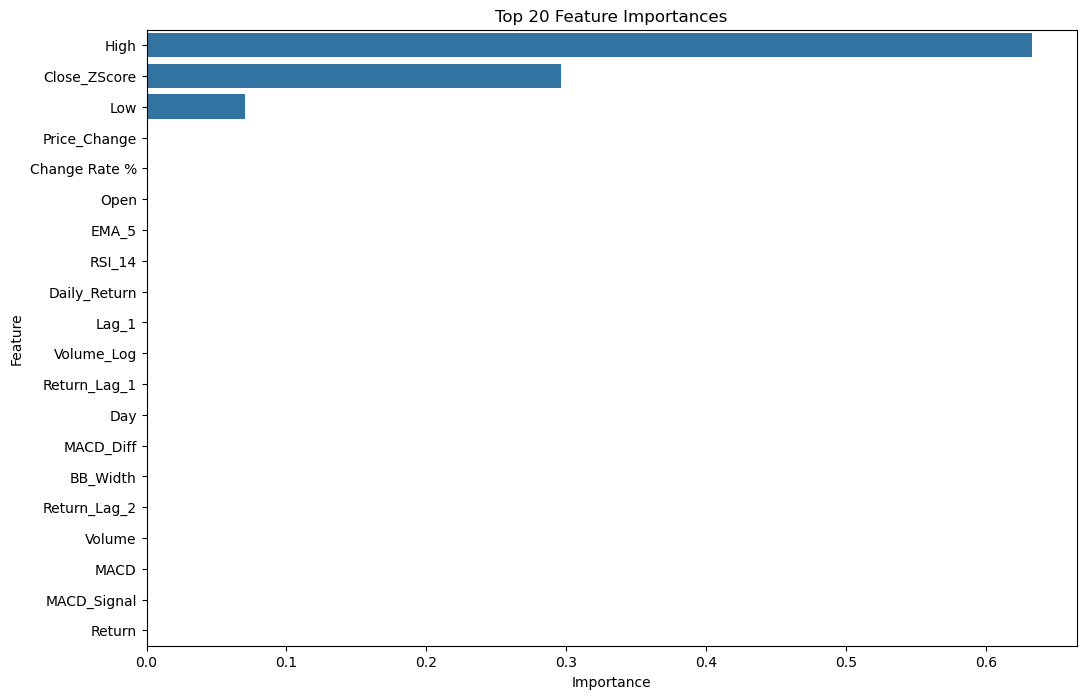

In [72]:
# Import necessary libraries for modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare data for modeling
# Drop rows with NaN values created by lag features and technical indicators
df_model = df.dropna()

# Define target variable and features
X = df_model.drop(['Close'], axis=1)
y = df_model['Close']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.show()

In [74]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming you already have your dataframe 'df'

# Replace NaN values with the median of each column
df.fillna(df.median(numeric_only=True), inplace=True)

# Select relevant numerical columns to normalize
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Apply the scaler to the selected numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])



### Model Selection and Training

#### Import Necessary Libraries

In [77]:
# Import necessary libraries
import pandas as pd
import numpy as np

# For modeling
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


# For LSTM
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

 ## Data Preparation

## a. Ensure Data is Sorted by Date

In [80]:
# Ensure data is sorted by date
df_model.sort_index(inplace=True)

# Define the proportion of data to use for training
train_size = int(len(df_model) * 0.8)
train_data = df_model.iloc[:train_size]
test_data = df_model.iloc[train_size:]

print(f"Training data points: {len(train_data)}")
print(f"Testing data points: {len(test_data)}")

Training data points: 7335
Testing data points: 1834


## Baseline Naïve Forecast

In [82]:
# Shift the test data by one day
test_data['Close_Last_Day'] = test_data['Close'].shift(1)

# Drop the first row with NaN
test_data_naive = test_data.dropna(subset=['Close_Last_Day'])
y_actual_naive = test_data_naive['Close']
y_pred_naive = test_data_naive['Close_Last_Day']

# Calculate Mean Absolute Error (MAE)
mae_naive = mean_absolute_error(y_actual_naive, y_pred_naive )
print(f"Baseline Naïve Forecast MAE: {mae_naive:.4f}")

Baseline Naïve Forecast MAE: 1.0834


## Preparing Data for Modeling

In [84]:
# Features and target
features = df_model.drop(['Close'], axis=1)
target = df_model['Close']

# Align train and test data
X_train = features.iloc[:train_size]
y_train = target.iloc[:train_size]
X_test = features.iloc[train_size:]
y_test = target.iloc[train_size:]

## Training the Random Forest Regressor with GridSearchCV & Predicting Close Price

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Hyperparameters:
{'max_depth': 5, 'max_features': 0.3, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}
Training MAE: 0.895580
Testing MAE: 0.853645
The model generalizes well.


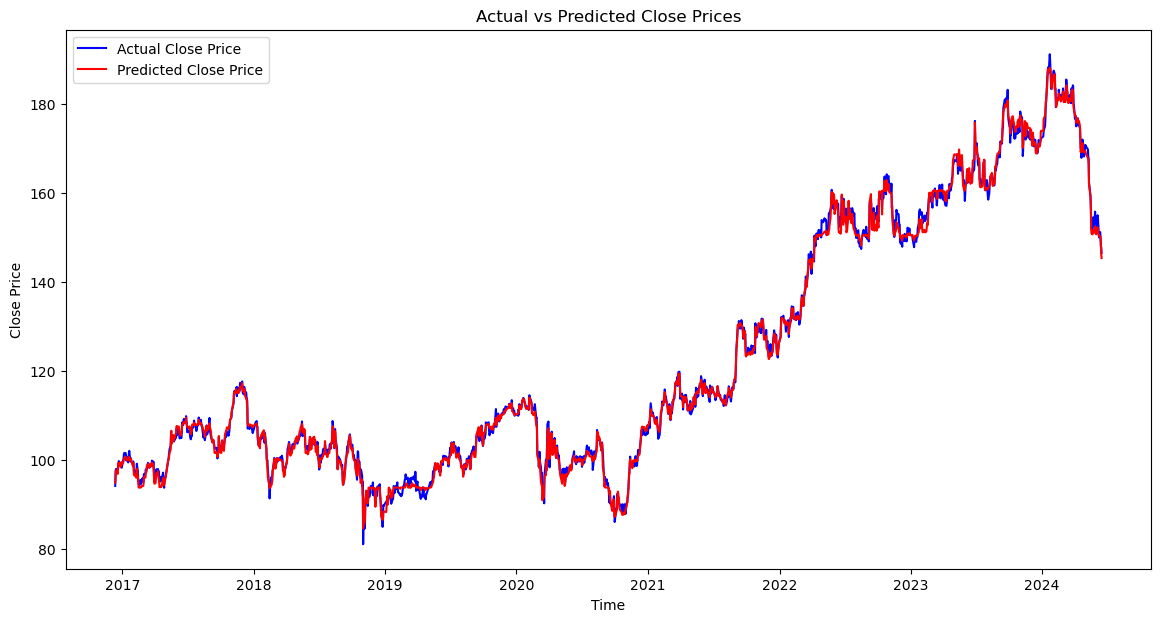

In [86]:
# Use TimeSeriesSplit for time-series-aware cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Adjusted parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [2, 3, 5],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [10, 20],
    'max_features': [0.3, 0.5]
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Print best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Predict on training data
y_train_pred = best_rf.predict(X_train)

# Predict on testing data
y_test_pred = best_rf.predict(X_test)

# Calculate MAE for training data

mae_train = mean_absolute_error(y_train, y_train_pred)
print(f"Training MAE: {mae_train:.6f}")

# Calculate MAE for testing data
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"Testing MAE: {mae_test:.6f}")

# Compare training and testing errors
if mae_test > mae_train * 1.2:
    print("The model may be overfitting.")
else:
    print("The model generalizes well.")

# Plot actual vs predicted Close prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, y_test_pred, label='Predicted Close Price', color='red')
plt.legend()
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.show()



## Saving and Loading the Random Forest Model

In [88]:
import joblib

# # Save the model to a file
# joblib.dump(best_rf, 'finalRF2.pkl')

# Load the model from a file (for future use)
loaded_rf_model = joblib.load('finalRF2.pkl')


In [89]:
y_actual_rf=y_test
y_pred_rf=loaded_rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_actual_rf, y_pred_rf)
print(f"Random Forest Model MAE: {mae_rf:.4f}")

Random Forest Model MAE: 0.8536


## Modeling with LSTM

#### We implement a Long Short-Term Memory (LSTM) neural network for time series forecasting. The data is scaled, and sequences are created to feed into the LSTM model.

### Preparing Data for LSTM

In [93]:
# Select features for LSTM (e.g., 'Close' price and maybe a few technical indicators)
lstm_features = ['Close', 'Volume', 'SMA_5', 'EMA_5', 'RSI_14']

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_model[lstm_features])

# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i, 0])  # Assuming 'Close' is the first column
    return np.array(X), np.array(y)

# Define sequence length (number of past days to use for prediction)
sequence_length = 100  # Using past 60 days to predict the next day

# Split data into training and testing sets
scaled_train = scaled_data[:train_size]
scaled_test = scaled_data[train_size:]  # Overlap for sequences

# Create sequences for training and testing
X_train_lstm, y_train_lstm = create_sequences(scaled_train, sequence_length)
X_test_lstm, y_test_lstm = create_sequences(scaled_test, sequence_length)

print(f"Shape of X_train: {X_train_lstm.shape}")
print(f"Shape of y_train: {y_train_lstm.shape}")
print(f"Shape of X_test: {X_test_lstm.shape}")
print(f"Shape of y_test: {y_test_lstm.shape}")

Shape of X_train: (7235, 100, 5)
Shape of y_train: (7235,)
Shape of X_test: (1734, 100, 5)
Shape of y_test: (1734,)


## Building and Training the LSTM Mode


In [95]:
# # Import necessary libraries for the model
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout
# from sklearn.model_selection import train_test_split

# # Train-test split, ensuring no shuffling
# X_train, X_val, y_train, y_val = train_test_split(X_train_lstm, y_train_lstm, test_size=0.1, shuffle=False)

# # Build the LSTM model
# model = Sequential()

# # Add LSTM layers with tuned Dropout regularization
# model.add(LSTM(units=150, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
# model.add(Dropout(0.2))  # Tuning dropout rate

# model.add(LSTM(units=50))
# model.add(Dropout(0.2))

# # Add Dense layer with L2 regularization
# model.add(Dense(1, kernel_regularizer=l2(0.01)))  # Adjusting regularization

# # Compile the model with a reduced learning rate and learning rate schedule
# from keras.optimizers import Adam
# from keras.callbacks import ReduceLROnPlateau

# optimizer = Adam(learning_rate=0.0003)  # Further reduced learning rate
# model.compile(optimizer=optimizer, loss='mean_absolute_error')

# # Add early stopping and learning rate scheduler
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# # Train the model with a larger batch size
# history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr])
# y_pred=model.predict(X_test_lstm)
# # Plot training and validation loss over epochs
# # Plot the actual and predicted prices

# # Plot training and validation loss over epochs
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('LSTM Model Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

### Saving the LSTM MODEL

In [97]:
# model.save('lstm22.keras')  

### Loading and Precticting the Price

In [99]:

from keras.models import load_model

# Load the saved model
loaded_model = load_model('lstm22.keras')


# Now you can use the loaded model for predictions or further training
lstm_predictions = loaded_model.predict(X_test_lstm)


# Make predictions on the test set


# Prepare data for inverse transformation
# Append zeros for the other features, ensuring we have the same number of features
num_features = X_test_lstm.shape[2]  # Total number of features (e.g., 5: 'Close', 'Volume', 'SMA_5', etc.)
zeros_for_padding = np.zeros((lstm_predictions.shape[0], num_features - 1))  # Create zero padding for the remaining features

# Concatenate predictions with zeros to match the original number of features
predicted_prices = np.concatenate((lstm_predictions, zeros_for_padding), axis=1)

# Do the same for the actual prices to maintain shape compatibility
actual_prices = np.concatenate((y_test_lstm.reshape(-1, 1), zeros_for_padding), axis=1)

# Inverse transform to get actual prices
predicted_prices = scaler.inverse_transform(predicted_prices)[:, 0]  # Only taking the 'Close' price after inverse transform
actual_prices = scaler.inverse_transform(actual_prices)[:, 0]

# Create a DataFrame to compare actual and predicted prices
results = pd.DataFrame({
    'Date': df_model.index[-len(actual_prices):],  # Use the appropriate date range
    'Actual': actual_prices,
    'Predicted': predicted_prices
})
results.set_index('Date', inplace=True)

# Create pandas Series for actual and predicted prices with appropriate indices
y_actual_lstm = results['Actual']
y_pred_lstm = results['Predicted']


# Calculate Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae_lstm = mean_absolute_error(results['Actual'], results['Predicted'])
print(f"LSTM Model MAE: {mae_lstm:.4f}")

55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step
LSTM Model MAE: 1.3206


### Plotting the Actual Close Price Vs Predicted Closed Price

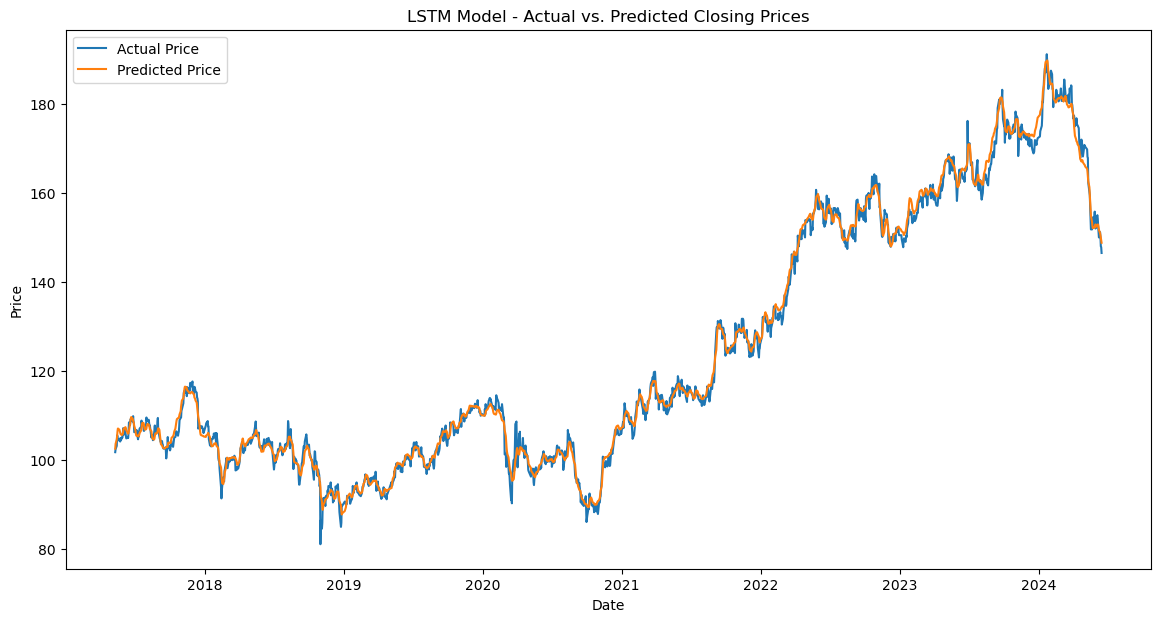

In [101]:
# Plot the actual and predicted prices
plt.figure(figsize=(14, 7))
plt.plot(results['Actual'], label='Actual Price')
plt.plot(results['Predicted'], label='Predicted Price')
plt.title('LSTM Model - Actual vs. Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Ensemble Modeling

#### We combine the predictions from the Random Forest and LSTM models using weighted averaging based on their inverse MAE to create an ensemble model.

## Aligning Predictions

#### Ensure that the predictions from both models are aligned in time for accurate comparison and ensemble.

In [106]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Define sequence length
sequence_length = 100

# Original Test Set from Random Forest
original_y_test = y_test.copy()
original_rf_pred = y_test_pred.copy()  # This is a NumPy array

# Adjust the Random Forest's test set to match LSTM's test set
# Exclude the first 'sequence_length' samples
aligned_y_test = original_y_test.iloc[sequence_length:].reset_index(drop=True)

# Since original_rf_pred is a NumPy array, slice it directly without using reset_index
aligned_rf_pred = original_rf_pred[sequence_length:]

# Adjust LSTM predictions
# Ensure y_pred_lstm is a 1D array
# Check if y_pred_lstm is a NumPy array or a pandas Series
if isinstance(y_pred_lstm, pd.Series):
    y_pred_lstm_flat = y_pred_lstm.values.flatten()
elif isinstance(y_pred_lstm, np.ndarray):
    y_pred_lstm_flat = y_pred_lstm.flatten()
else:
    raise TypeError("y_pred_lstm must be a pandas Series or a numpy array.")

# Create a Series for LSTM predictions and reset its index
aligned_lstm_pred = pd.Series(y_pred_lstm_flat, name='LSTM_Predicted').reset_index(drop=True)

# Ensure lengths match
if len(aligned_rf_pred) != len(aligned_lstm_pred):
    raise ValueError(f"Aligned prediction lengths do not match! RF: {len(aligned_rf_pred)}, LSTM: {len(aligned_lstm_pred)}")

# Create a DataFrame for comparison
ensemble_results_aligned = pd.DataFrame({
    'Actual': aligned_y_test.values,
    'RandomForest_Predicted': aligned_rf_pred,
    'LSTM_Predicted': aligned_lstm_pred.values
}, index=aligned_y_test.index)

# Print lengths to verify alignment
print(f"Length of Aligned Actual: {len(ensemble_results_aligned['Actual'])}")
print(f"Length of Aligned RF Predictions: {len(ensemble_results_aligned['RandomForest_Predicted'])}")
print(f"Length of Aligned LSTM Predictions: {len(ensemble_results_aligned['LSTM_Predicted'])}")

# Optional: Inspect the first few rows to ensure proper alignment
print("\nFirst 5 entries of Ensemble Results Aligned:")
print(ensemble_results_aligned.head())

print("\nLast 5 entries of Ensemble Results Aligned:")
print(ensemble_results_aligned.tail())

Length of Aligned Actual: 1734
Length of Aligned RF Predictions: 1734
Length of Aligned LSTM Predictions: 1734

First 5 entries of Ensemble Results Aligned:
   Actual  RandomForest_Predicted  LSTM_Predicted
0   101.7              100.919642      102.496213
1   102.4              101.539102      103.583716
2   103.1              102.240842      104.533290
3   105.5              105.565680      105.342391
4   105.3              106.515486      106.389082

Last 5 entries of Ensemble Results Aligned:
      Actual  RandomForest_Predicted  LSTM_Predicted
1729   151.2              150.252686      150.950312
1730   150.2              150.105447      150.473731
1731   148.0              148.633399      149.921676
1732   147.8              146.258394      149.290868
1733   146.5              145.358762      148.797403


In [107]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Define sequence length
sequence_length = 100

# Original Test Set from Random Forest
original_y_test = y_test.copy()
original_rf_pred = y_test_pred.copy()  # This is a NumPy array

# Adjust the Random Forest's test set to match LSTM's test set
# Exclude the first 'sequence_length' samples
aligned_y_test = original_y_test.iloc[sequence_length:].reset_index(drop=True)

# Since original_rf_pred is a NumPy array, slice it directly without using reset_index
aligned_rf_pred = original_rf_pred[sequence_length:]  # Removed .reset_index(drop=True)

# Adjust LSTM predictions
# Ensure y_pred_lstm is a 1D array
# Convert the pandas Series to a NumPy array before flattening
y_pred_lstm_flat = y_pred_lstm.to_numpy().flatten()

# Create a Series for LSTM predictions and reset its index
aligned_lstm_pred = pd.Series(y_pred_lstm_flat, name='LSTM_Predicted').reset_index(drop=True)

# Ensure lengths match
if len(aligned_rf_pred) != len(aligned_lstm_pred):
    raise ValueError(f"Aligned prediction lengths do not match! RF: {len(aligned_rf_pred)}, LSTM: {len(aligned_lstm_pred)}")

# Create a DataFrame for comparison
ensemble_results_aligned = pd.DataFrame({
    'Actual': aligned_y_test.values,
    'RandomForest_Predicted': aligned_rf_pred,
    'LSTM_Predicted': aligned_lstm_pred.values
}, index=aligned_y_test.index)

# Print lengths to verify alignment
print(f"Length of Aligned Actual: {len(ensemble_results_aligned['Actual'])}")
print(f"Length of Aligned RF Predictions: {len(ensemble_results_aligned['RandomForest_Predicted'])}")
print(f"Length of Aligned LSTM Predictions: {len(ensemble_results_aligned['LSTM_Predicted'])}")

print("\nFirst 5 entries of Ensemble Results Aligned:")
print(ensemble_results_aligned.head())

print("\nLast 5 entries of Ensemble Results Aligned:")
print(ensemble_results_aligned.tail())


Length of Aligned Actual: 1734
Length of Aligned RF Predictions: 1734
Length of Aligned LSTM Predictions: 1734

First 5 entries of Ensemble Results Aligned:
   Actual  RandomForest_Predicted  LSTM_Predicted
0   101.7              100.919642      102.496213
1   102.4              101.539102      103.583716
2   103.1              102.240842      104.533290
3   105.5              105.565680      105.342391
4   105.3              106.515486      106.389082

Last 5 entries of Ensemble Results Aligned:
      Actual  RandomForest_Predicted  LSTM_Predicted
1729   151.2              150.252686      150.950312
1730   150.2              150.105447      150.473731
1731   148.0              148.633399      149.921676
1732   147.8              146.258394      149.290868
1733   146.5              145.358762      148.797403


## Calculating Weights and Creating Ensemble Predictions

#### Weights are assigned based on the inverse of the MAE of each model, giving more weight to the better-performing model.

Weight for Random Forest: 0.6074
Weight for LSTM: 0.3926
Ensemble Weighted MAE: 0.841169
Random Forest MAE: 0.853645
LSTM MAE: 1.3206


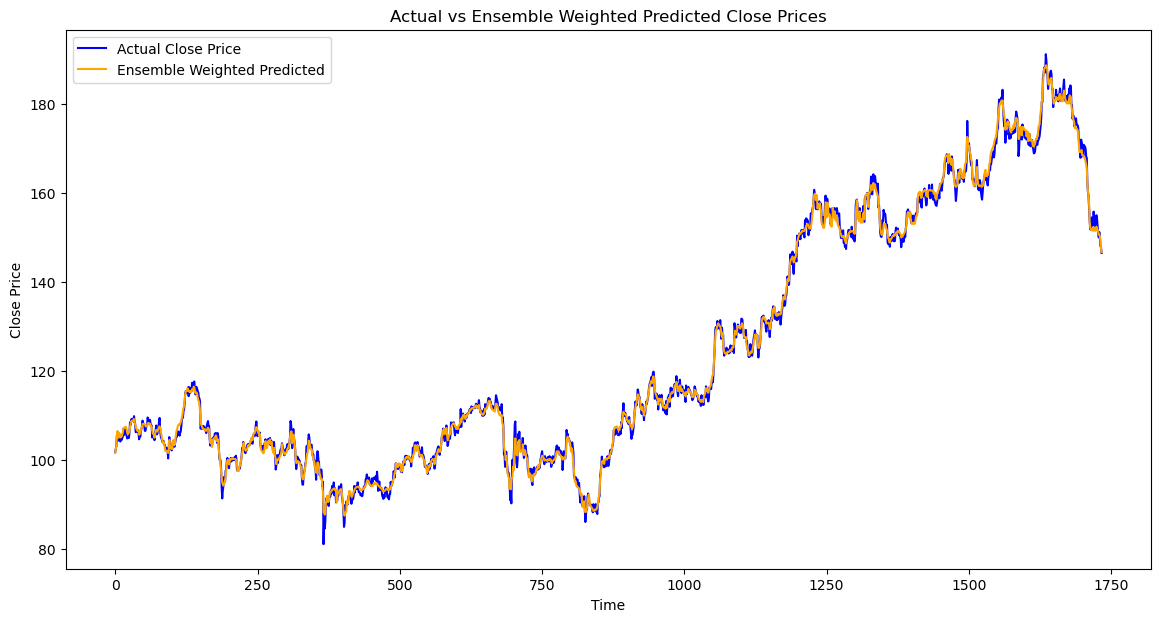

In [110]:
# Calculate weights based on inverse MAE
mae_rf = 0.853645  # MAE for Random Forest
mae_lstm = 1.3206   # MAE for LSTM

# Inverse weights
inv_mae_rf = 1 / mae_rf
inv_mae_lstm = 1 / mae_lstm

# Normalize weights so that they sum to 1
total = inv_mae_rf + inv_mae_lstm
weight_rf = inv_mae_rf / total
weight_lstm = inv_mae_lstm / total

print(f"Weight for Random Forest: {weight_rf:.4f}")
print(f"Weight for LSTM: {weight_lstm:.4f}")

# Weighted Averaging
ensemble_results_aligned['Ensemble_Weighted'] = (weight_rf * ensemble_results_aligned['RandomForest_Predicted']) + \
                                               (weight_lstm * ensemble_results_aligned['LSTM_Predicted'])

# Calculate MAE for the weighted ensemble
y_actual_ensemble=ensemble_results_aligned['Actual']
y_pred_ensemble=ensemble_results_aligned['Ensemble_Weighted']
mae_ensemble_weighted = mean_absolute_error(y_actual_ensemble,y_pred_ensemble)
print(f"Ensemble Weighted MAE: {mae_ensemble_weighted:.6f}")

# Compare with individual MAEs
print(f"Random Forest MAE: {mae_rf}")
print(f"LSTM MAE: {mae_lstm}")

# Plot Actual vs Ensemble Weighted Predicted Prices
plt.figure(figsize=(14, 7))
plt.plot(ensemble_results_aligned.index, ensemble_results_aligned['Actual'], label='Actual Close Price', color='blue')
plt.plot(ensemble_results_aligned.index, ensemble_results_aligned['Ensemble_Weighted'], label='Ensemble Weighted Predicted', color='orange')
plt.legend()
plt.title('Actual vs Ensemble Weighted Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.show()


### Cross-Validation LSTM for Time Series Data

In [112]:
# from keras.optimizers import Adam
# from keras.callbacks import ReduceLROnPlateau
# from tensorflow.keras.regularizers import l1, l2
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping


# # Define number of splits
# n_splits = 5
# tscv = TimeSeriesSplit(n_splits=n_splits)

# # Collect MAE scores
# mae_scores = []

# for fold, (train_index, test_index) in enumerate(tscv.split(X_train_lstm)):
#     X_train_fold, X_val_fold = X_train_lstm[train_index], X_train_lstm[test_index]
#     y_train_fold, y_val_fold = y_train_lstm[train_index], y_train_lstm[test_index]

#     # Build and train the model on the fold
#     model = Sequential()
#     model.add(LSTM(units=150, return_sequences=True, input_shape=(X_train_fold.shape[1], X_train_fold.shape[2])))
#     model.add(Dropout(0.2))
#     model.add(LSTM(units=50))
#     model.add(Dropout(0.2))
#     model.add(Dense(1, kernel_regularizer=l2(0.01)))  # Adjusting regularization 
#     early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#     reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
#     optimizer = Adam(learning_rate=0.0003)  # Further reduced learning rate
#     model.compile(optimizer=optimizer, loss='mean_absolute_error')
#     model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=64, verbose=1,callbacks=[early_stopping, reduce_lr])





#     # Evaluate on validation fold
#     val_predictions = model.predict(X_val_fold)
#     val_predictions = np.concatenate((val_predictions, X_val_fold[:, -1, 1:]), axis=1)
#     val_predictions = scaler.inverse_transform(val_predictions)[:, 0]

#     # Prepare actual values for comparison
#     y_val_actual = np.concatenate((y_val_fold.reshape(-1, 1), X_val_fold[:, -1, 1:]), axis=1)
#     y_val_actual = scaler.inverse_transform(y_val_actual)[:, 0]

#     # Calculate MAE for the fold
#     mae = mean_absolute_error(y_val_actual, val_predictions)
#     mae_scores.append(mae)
#     print(f"Fold {fold + 1} MAE: {mae:.4f}")

# # After the cross-validation loop
# average_mae = np.mean(mae_scores)
# print(f"Average MAE across all folds: {average_mae:.4f}")

#### note : uncomment to cross check the Average MAE value

### Model Evalution

In [114]:
# Import necessary libraries for evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

### Function to Metrics Calculation

In [116]:
def calculate_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    # Handle division by zero in MAPE
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"{model_name} Evaluation Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4%}")
    print("\n")

    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape}

In [117]:
# Evaluate Baseline Naïve Model
metrics_naive = calculate_metrics(y_actual_naive, y_pred_naive, "Baseline Naïve Model")

Baseline Naïve Model Evaluation Metrics:
Mean Absolute Error (MAE): 1.0834
Mean Squared Error (MSE): 2.2585
Root Mean Squared Error (RMSE): 1.5028
Mean Absolute Percentage Error (MAPE): 0.9055%




In [118]:
# Evaluate Random Forest Model
metrics_rf = calculate_metrics(y_actual_rf, y_pred_rf, "Random Forest Model")

Random Forest Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.8536
Mean Squared Error (MSE): 1.2153
Root Mean Squared Error (RMSE): 1.1024
Mean Absolute Percentage Error (MAPE): 0.7076%




In [119]:
# Evaluate LSTM Model
metrics_lstm = calculate_metrics(y_actual_lstm, y_pred_lstm, "LSTM Model")

LSTM Model Evaluation Metrics:
Mean Absolute Error (MAE): 1.3206
Mean Squared Error (MSE): 3.1013
Root Mean Squared Error (RMSE): 1.7610
Mean Absolute Percentage Error (MAPE): 1.0768%




In [120]:
metrics_ensemble_weighted  = calculate_metrics(y_actual_ensemble, y_pred_ensemble, "Ensemble_Weighted")

Ensemble_Weighted Evaluation Metrics:
Mean Absolute Error (MAE): 0.8412
Mean Squared Error (MSE): 1.2022
Root Mean Squared Error (RMSE): 1.0965
Mean Absolute Percentage Error (MAPE): 0.6887%




## Residual Analysis
### Residuals are the differences between actual and predicted values.

### Function to Plot Residuals

In [123]:
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    
    # Plot residuals over time
    plt.figure(figsize=(14, 6))
    plt.plot(y_true.index, residuals, label='Residuals')
    plt.hlines(0, y_true.index.min(), y_true.index.max(), colors='r', linestyles='dashed')
    plt.title(f"{model_name} Residuals Over Time")
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()
    
    # Residuals histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.title(f"{model_name} Residuals Distribution")
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()
    
    return residuals

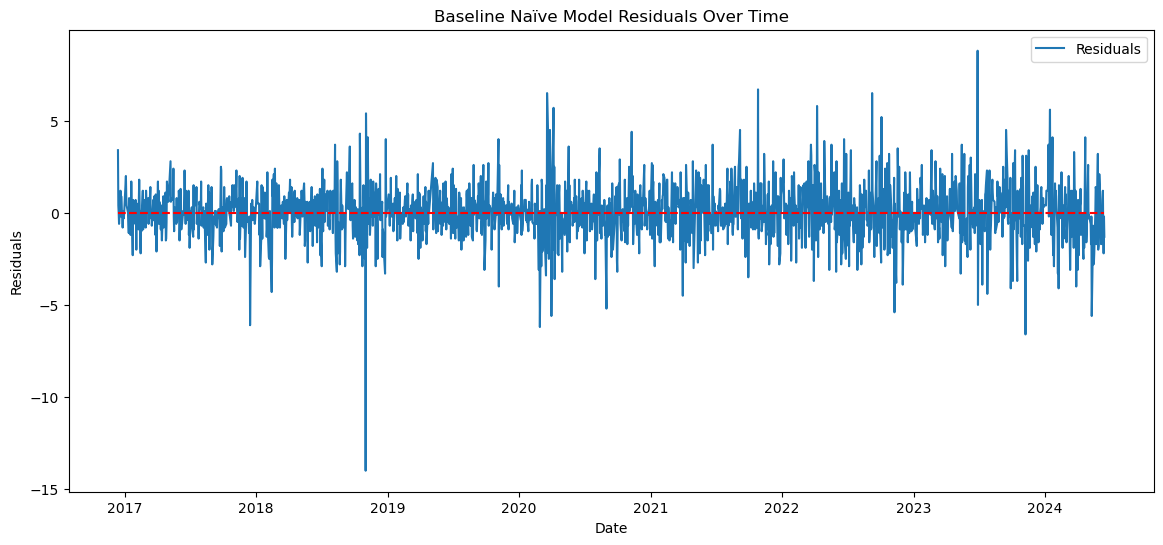

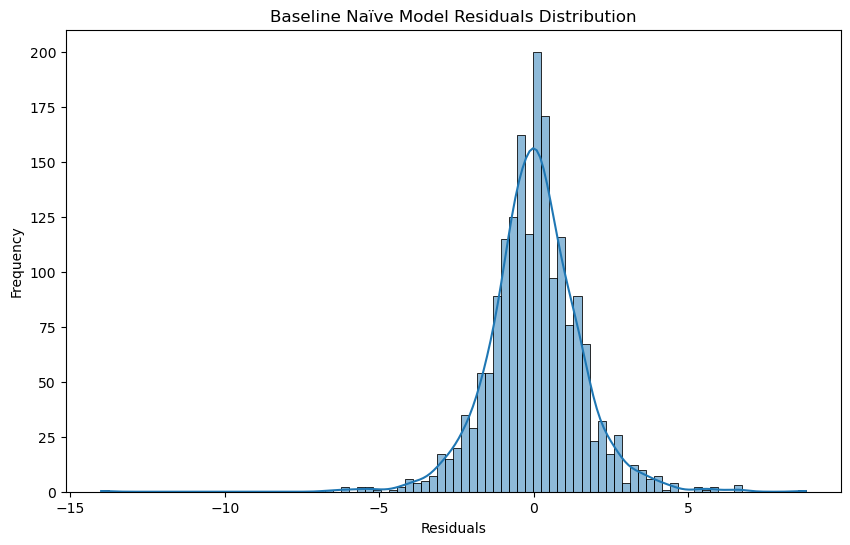

In [124]:
# Plot residuals for Baseline Naïve Model
residuals_naive = plot_residuals(y_actual_naive, y_pred_naive, "Baseline Naïve Model")

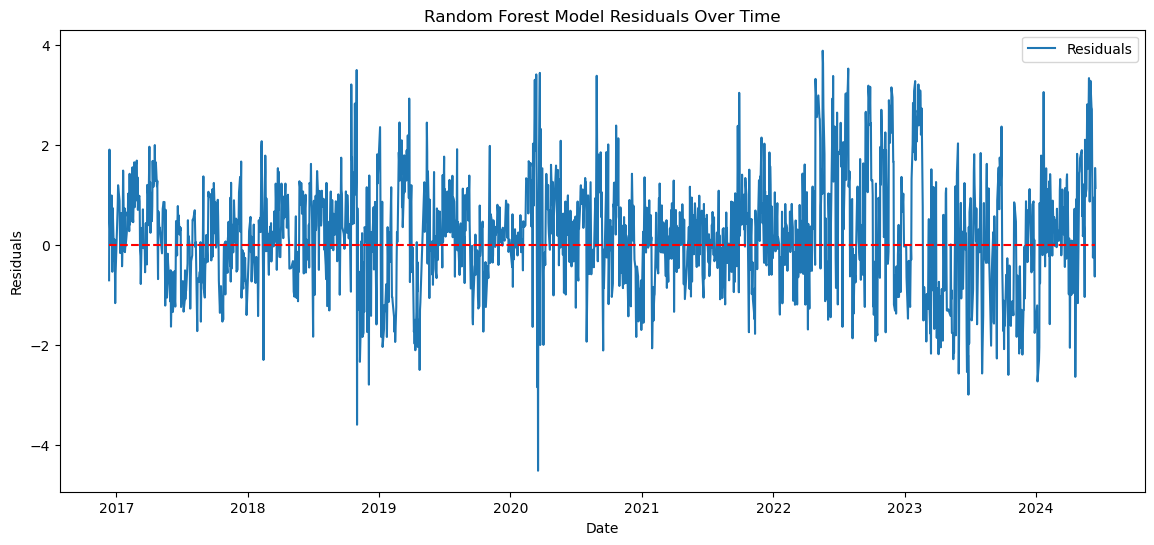

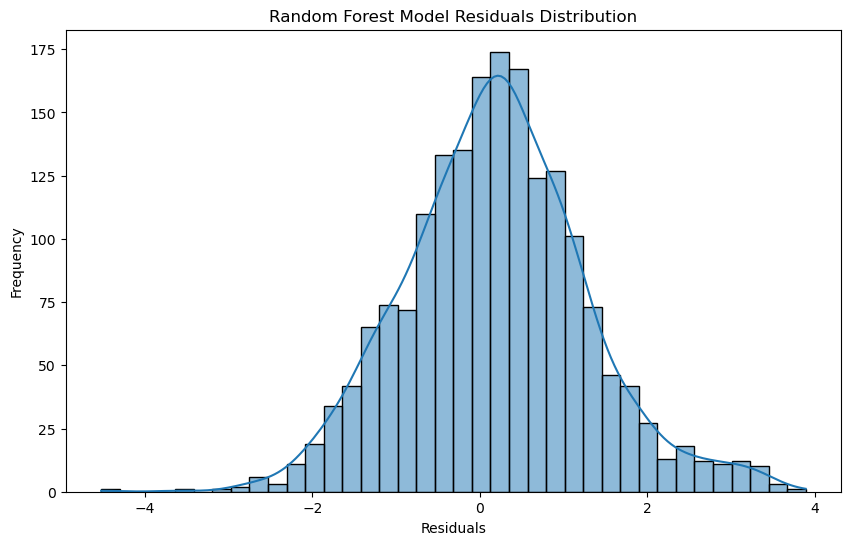

In [125]:
# Plot residuals for Random Forest Model
residuals_rf = plot_residuals(y_actual_rf, y_pred_rf, "Random Forest Model")

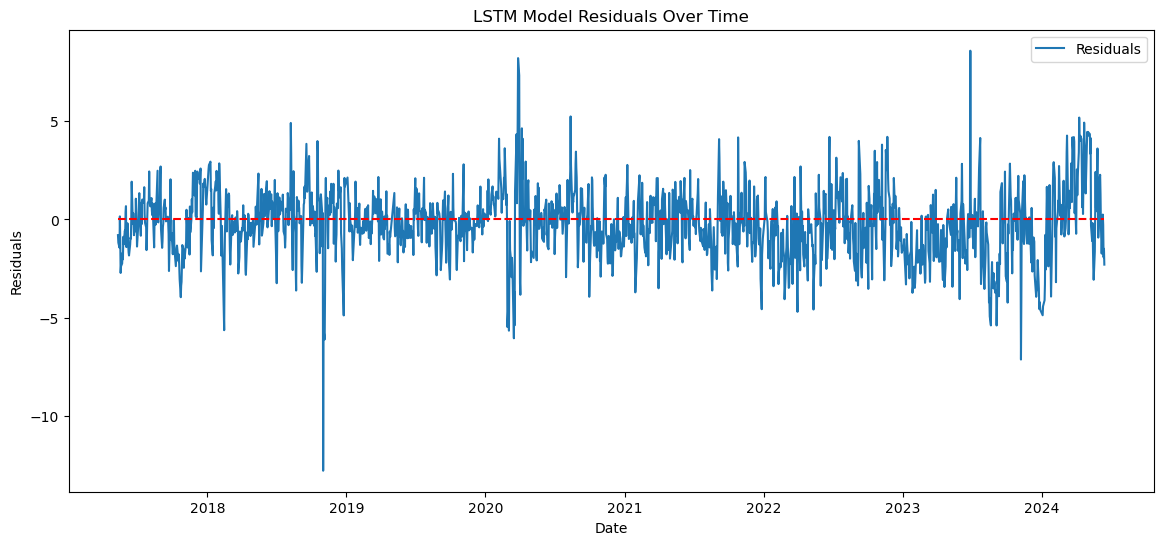

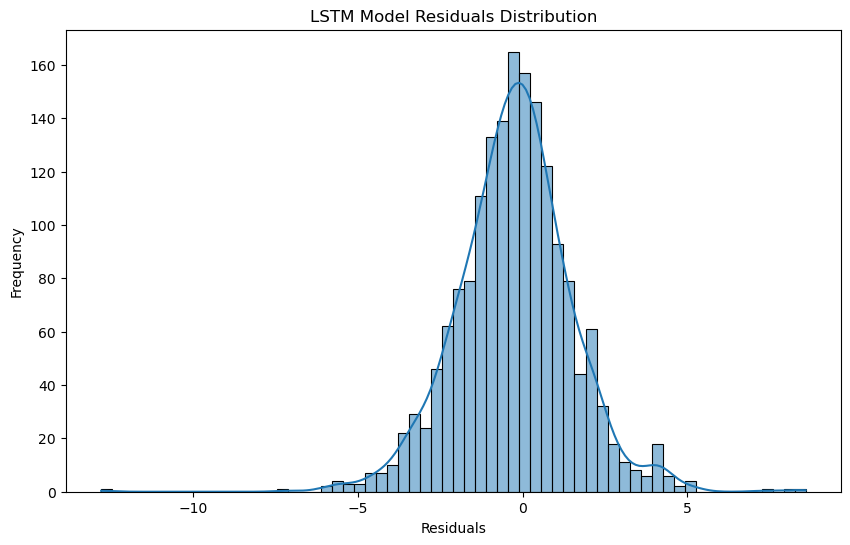

In [126]:
# Plot residuals for LSTM Model
# Since y_actual_lstm may not have a datetime index, create one if necessary
if not isinstance(y_actual_lstm, pd.Series):
    y_actual_lstm = pd.Series(y_actual_lstm, index=df_model.index[-len(y_actual_lstm):])
    y_pred_lstm = pd.Series(y_pred_lstm, index=df_model.index[-len(y_pred_lstm):])

residuals_lstm = plot_residuals(y_actual_lstm, y_pred_lstm, "LSTM Model")

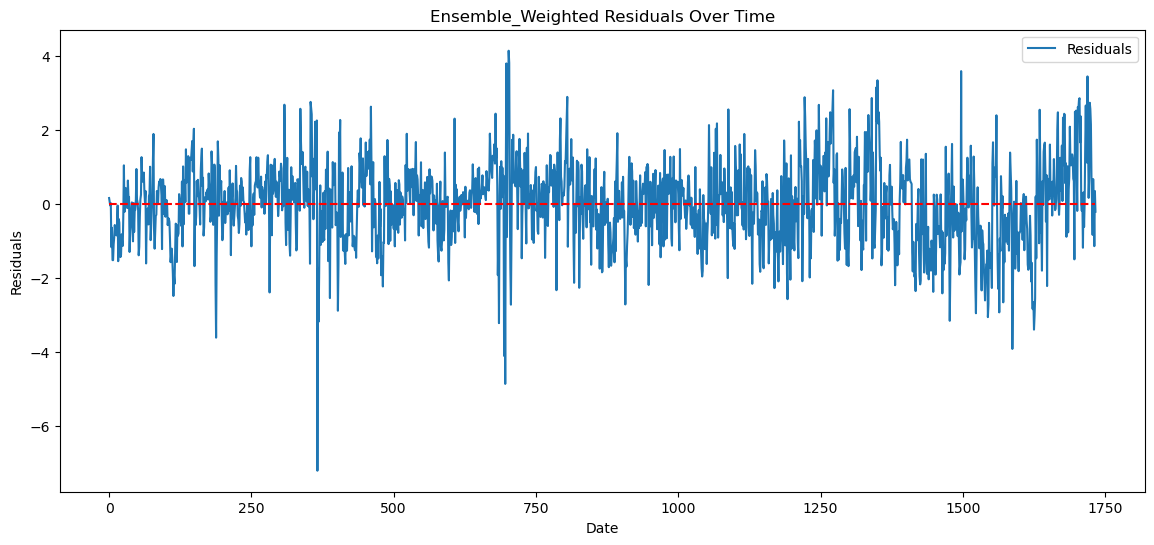

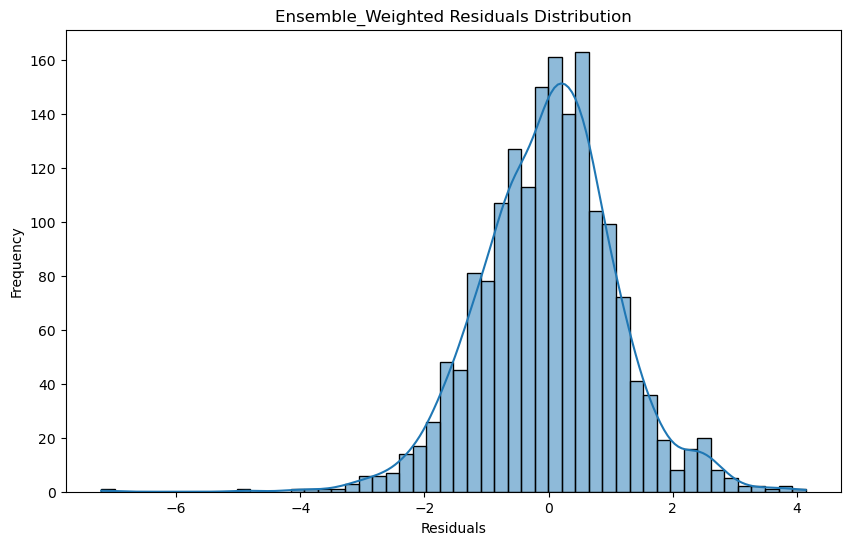

In [127]:
residuals_ensemble_weighted = plot_residuals(y_actual_ensemble, y_pred_ensemble, "Ensemble_Weighted")

### Prediction vs. Actual Plots

In [130]:
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(14, 7))
    plt.plot(y_true.index, y_true, label='Actual Price')
    plt.plot(y_true.index, y_pred, label='Predicted Price')
    plt.title(f"{model_name} - Actual vs. Predicted Prices")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

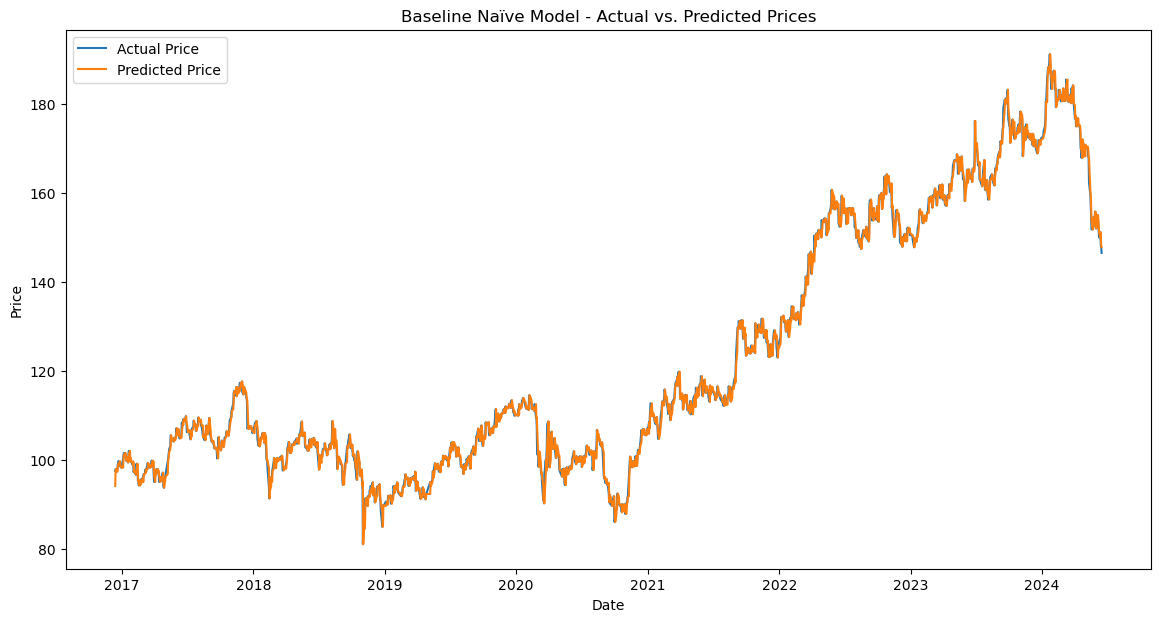

In [132]:
# Plot predictions vs. actual for Baseline Naïve Model
plot_predictions(y_actual_naive, y_pred_naive, "Baseline Naïve Model")

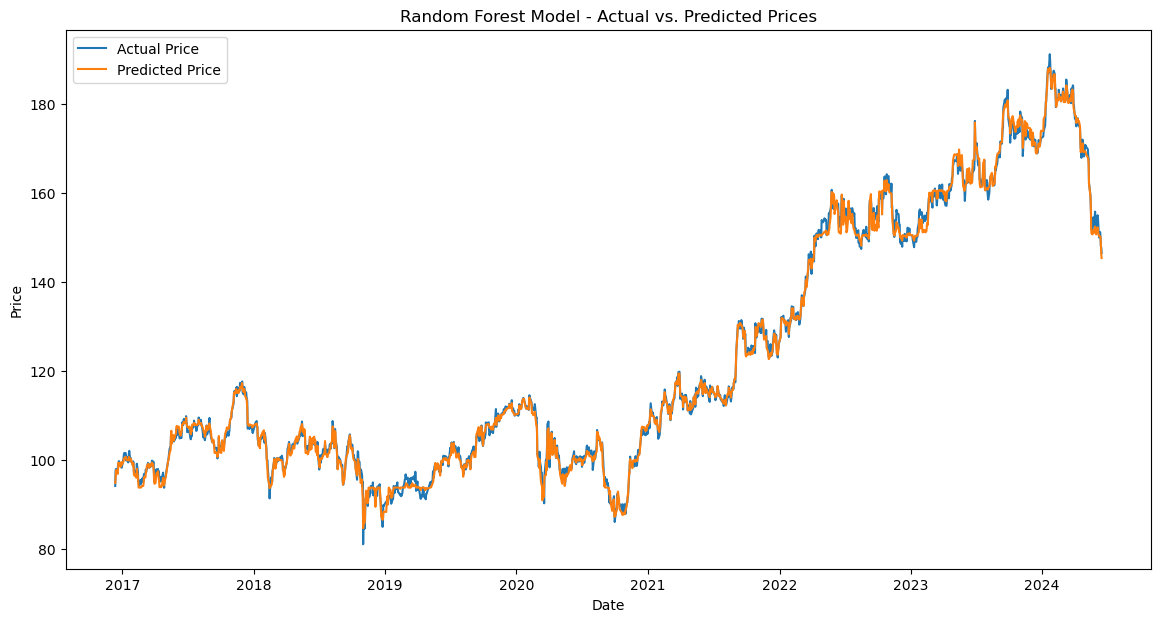

In [134]:
# Plot predictions vs. actual for Random Forest Model
plot_predictions(y_actual_rf, y_pred_rf, "Random Forest Model")

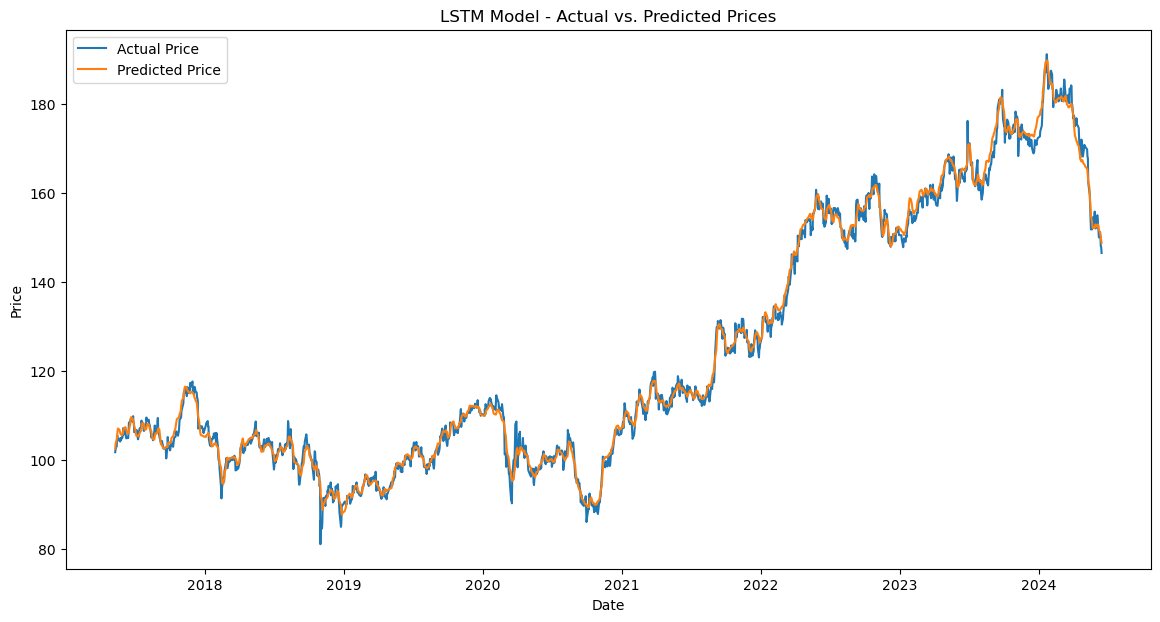

In [136]:
# Plot predictions vs. actual for LSTM Model
plot_predictions(y_actual_lstm, y_pred_lstm, "LSTM Model")

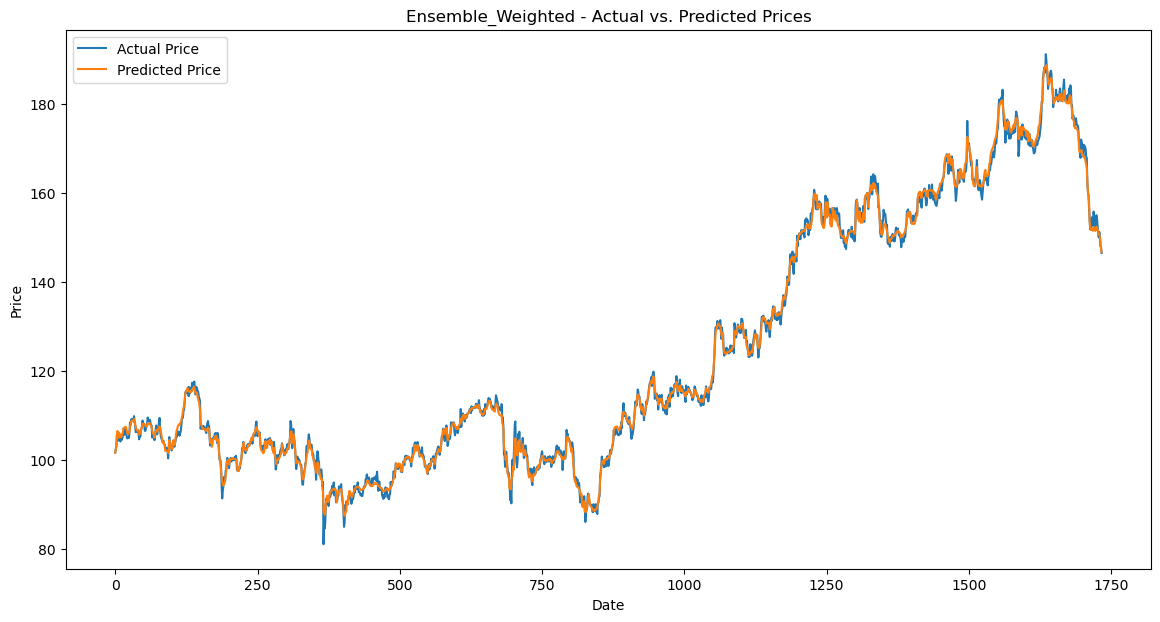

In [138]:
plot_predictions(y_actual_ensemble, y_pred_ensemble, "Ensemble_Weighted")

## Error Distribution Analysis

In [141]:
def analyze_error_distribution(residuals, model_name):
    # Plot error distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.title(f"{model_name} Error Distribution")
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.show()
    
    # QQ Plot
    import scipy.stats as stats
    plt.figure(figsize=(6, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f"{model_name} Residuals QQ Plot")
    plt.show()

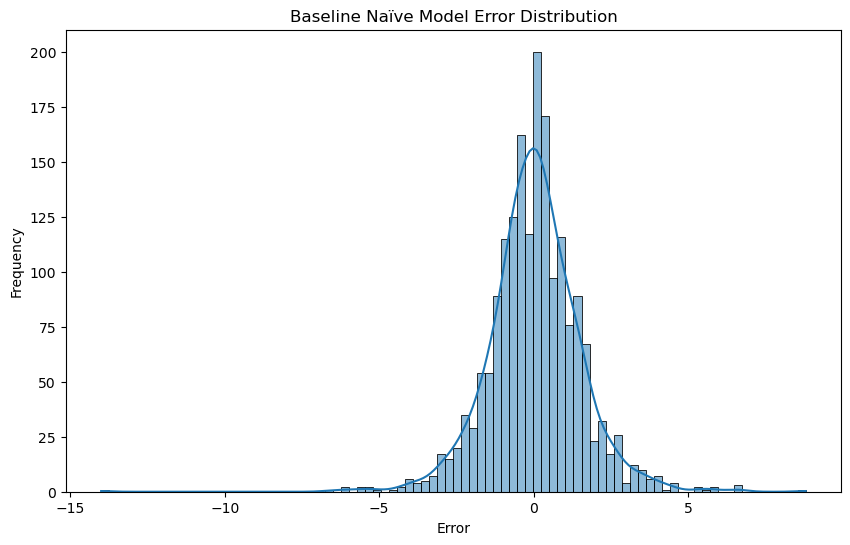

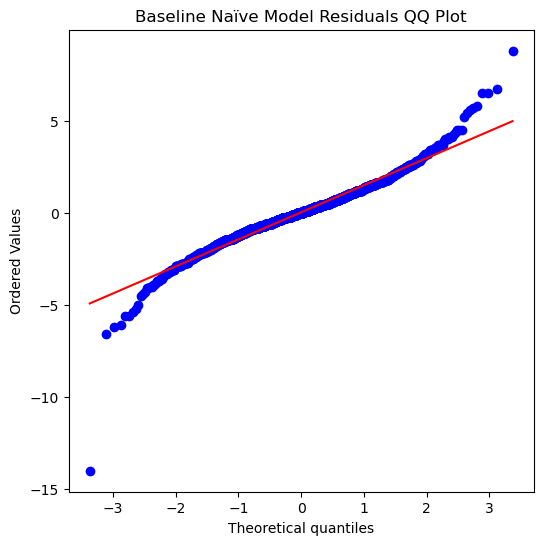

In [143]:
# Analyze error distribution for Baseline Naïve Model
analyze_error_distribution(residuals_naive, "Baseline Naïve Model")

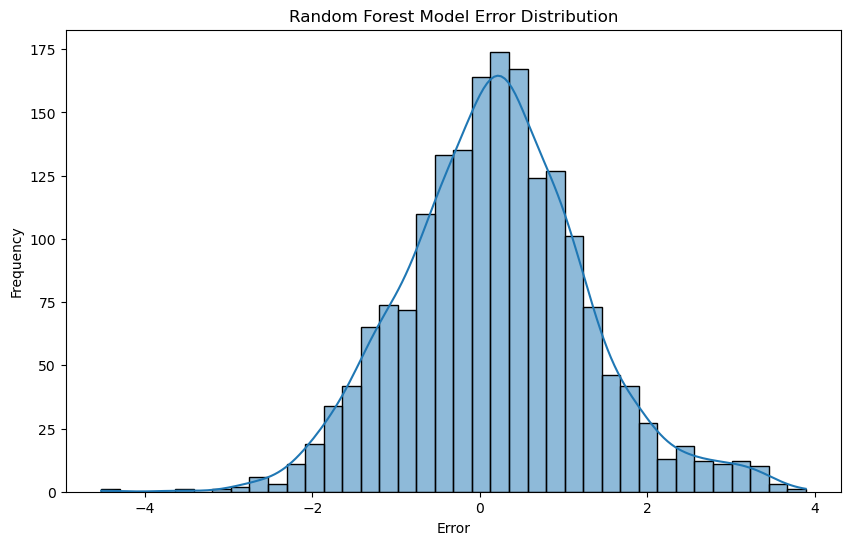

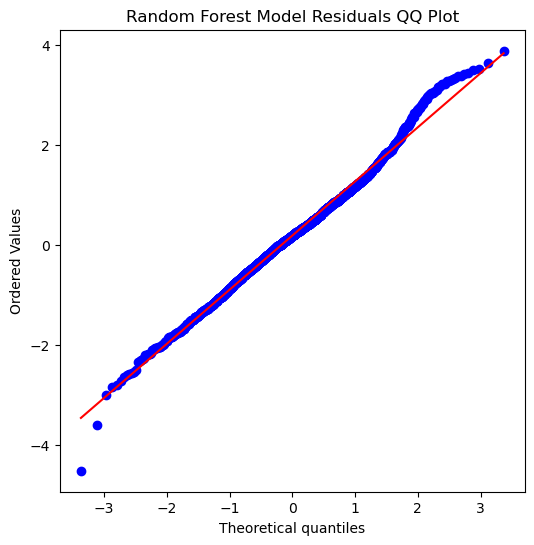

In [145]:
# Analyze error distribution for Random Forest Model
analyze_error_distribution(residuals_rf, "Random Forest Model")

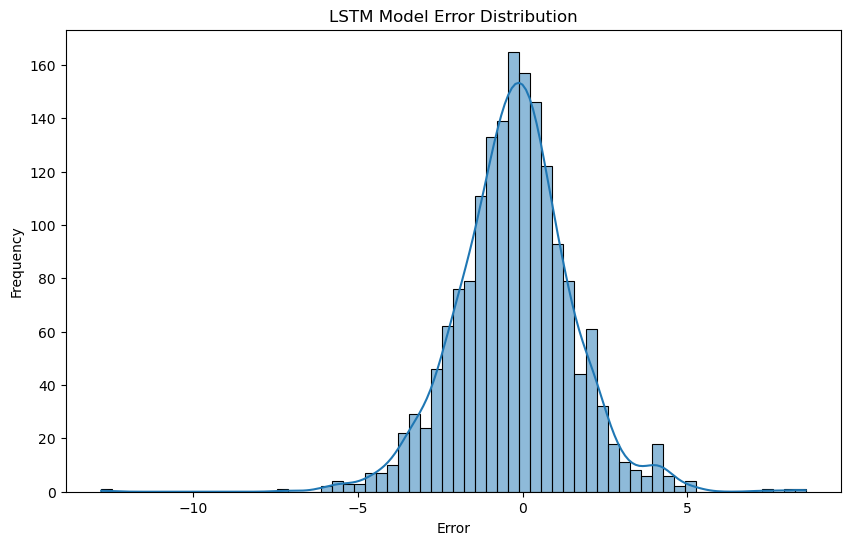

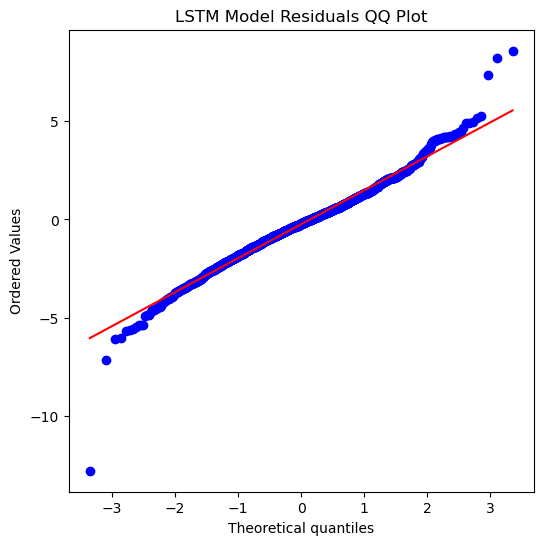

In [147]:
# Analyze error distribution for LSTM Model
analyze_error_distribution(residuals_lstm, "LSTM Model")

In [ ]:



analyze_error_distribution(residuals_ensemble_weighted, "Ensemble_Weighted")


# Model Comparison

## Compile Evaluation Metrics

In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate metrics for Ensemble_Weighted
mae_ensemble_weighted = mean_absolute_error(y_actual_ensemble, y_pred_ensemble)
mse_ensemble_weighted = mean_squared_error(y_actual_ensemble, y_pred_ensemble)
rmse_ensemble_weighted = mean_squared_error(y_actual_ensemble, y_pred_ensemble, squared=False)  # RMSE is the square root of MSE
mape_ensemble_weighted = np.mean(np.abs((y_actual_ensemble - y_pred_ensemble) / y_actual_ensemble)) * 100  # MAPE

In [151]:
# Create the DataFrame with the metrics for all models, including Ensemble_Weighted
metrics_df = pd.DataFrame({
    'Model': ['Baseline Naïve', 'Random Forest', 'LSTM', 'Ensemble_Weighted'],
    'MAE': [metrics_naive['MAE'], metrics_rf['MAE'], metrics_lstm['MAE'], mae_ensemble_weighted],
    'MSE': [metrics_naive['MSE'], metrics_rf['MSE'], metrics_lstm['MSE'], mse_ensemble_weighted],
    'RMSE': [metrics_naive['RMSE'], metrics_rf['RMSE'], metrics_lstm['RMSE'], rmse_ensemble_weighted],
    'MAPE': [metrics_naive['MAPE'], metrics_rf['MAPE'], metrics_lstm['MAPE'], mape_ensemble_weighted],
})

print(metrics_df)

               Model       MAE       MSE      RMSE      MAPE
0     Baseline Naïve  1.083361  2.258538  1.502843  0.009055
1      Random Forest  0.853645  1.215321  1.102416  0.007076
2               LSTM  1.320571  3.101267  1.761041  0.010768
3  Ensemble_Weighted  0.841169  1.202203  1.096450  0.688740


##  Visualize Model Performance

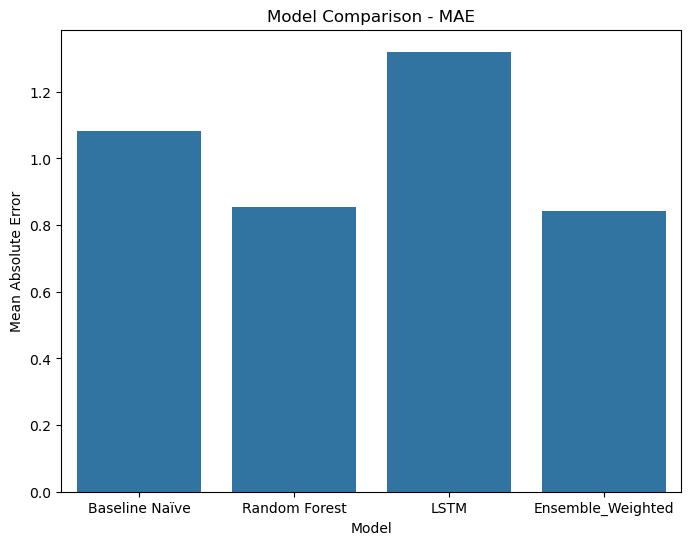

In [153]:
# Plot MAE for each model
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='MAE', data=metrics_df)
plt.title('Model Comparison - MAE')
plt.ylabel('Mean Absolute Error')
plt.show()



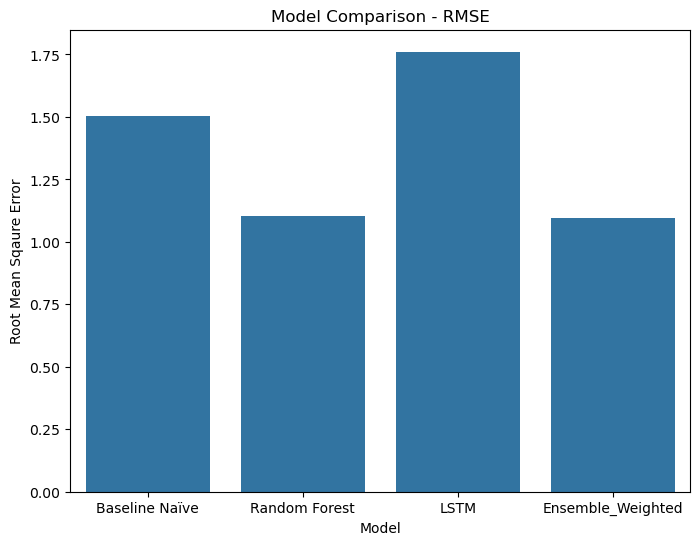

In [155]:
# Plot MAE for each model
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='RMSE', data=metrics_df)
plt.title('Model Comparison - RMSE')
plt.ylabel('Root Mean Sqaure Error')
plt.show()



##  Overfitting Check

## Random Forest

In [157]:
# Evaluate on training data
y_train_pred_rf = loaded_rf_model.predict(X_train)

# Calculate training metrics
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
print(f"Random Forest Training MAE: {mae_train_rf:.4f}")
print(f"Random Forest Testing MAE: {metrics_rf['MAE']:.4f}")

# Compare training and testing errors
if metrics_rf['MAE'] > mae_train_rf:
    print("Random Forest model may be overfitting.")
else:
    print("Random Forest model generalizes well.")

Random Forest Training MAE: 0.8956
Random Forest Testing MAE: 0.8536
Random Forest model generalizes well.


## LSTM Neural Network

In [161]:
# Get training predictions
lstm_train_predictions = loaded_model.predict(X_train_lstm)
train_pred_prices = np.concatenate((lstm_train_predictions, X_train_lstm[:, -1, 1:]), axis=1)
train_pred_prices = scaler.inverse_transform(train_pred_prices)[:, 0]

# Actual training prices
train_actual_prices = np.concatenate((y_train_lstm.reshape(-1,1), X_train_lstm[:, -1, 1:]), axis=1)
train_actual_prices = scaler.inverse_transform(train_actual_prices)[:, 0]

# Calculate training MAE
mae_train_lstm = mean_absolute_error(train_actual_prices, train_pred_prices)
print(f"LSTM Training MAE: {mae_train_lstm:.4f}")
print(f"LSTM Testing MAE: {metrics_lstm['MAE']:.4f}")

# Compare training and testing errors
if metrics_lstm['MAE'] > mae_train_lstm:
    print("LSTM model may be overfitting.")
else:
    print("LSTM model generalizes well.")

227/227 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step
LSTM Training MAE: 1.3547
LSTM Testing MAE: 1.3206
LSTM model generalizes well.


### Calculating Training and testing MAE OF Ensembled Model

In [163]:
mae_train = mean_absolute_error(y_train, y_train_pred)
print(f"Training MAE: {mae_train:.6f}")

# Calculate MAE for testing data
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"Testing MAE: {mae_test:.6f}")

Training MAE: 0.895580
Testing MAE: 0.853645


## Aligining Prediction to calculate training MAE of Ensembled Model

In [165]:
# Define sequence length
sequence_length = 100

# Original Training Set from Random Forest
original_y_train = y_train.copy()
original_rf_train_pred = y_train_pred.copy()  # This is a NumPy array

# Adjust the Random Forest's training set to match LSTM's training set
# Exclude the first 'sequence_length' samples from both actuals and predictions
aligned_y_train = original_y_train.iloc[sequence_length:].reset_index(drop=True)

# Since original_rf_train_pred is a NumPy array, slice it directly
aligned_rf_train_pred = original_rf_train_pred[sequence_length:]

# Adjust LSTM training predictions
# Ensure the LSTM predictions are flattened and truncated to match the Random Forest
y_train_pred_lstm_flat = train_pred_prices.flatten()

# Create a Series for LSTM training predictions and reset its index
aligned_lstm_train_pred = pd.Series(y_train_pred_lstm_flat, name='LSTM_Predicted').reset_index(drop=True)

# Ensure lengths match between Random Forest and LSTM training predictions
if len(aligned_rf_train_pred) != len(aligned_lstm_train_pred):
    raise ValueError(f"Aligned training prediction lengths do not match! RF: {len(aligned_rf_train_pred)}, LSTM: {len(aligned_lstm_train_pred)}")

# Create a DataFrame for the ensemble results (training data)
ensemble_train_results_aligned = pd.DataFrame({
    'Actual': aligned_y_train.values,
    'RandomForest_Predicted': aligned_rf_train_pred,
    'LSTM_Predicted': aligned_lstm_train_pred.values
}, index=aligned_y_train.index)

# Print lengths to verify alignment
print(f"Length of Aligned Actual (Training): {len(ensemble_train_results_aligned['Actual'])}")
print(f"Length of Aligned RF Predictions (Training): {len(ensemble_train_results_aligned['RandomForest_Predicted'])}")
print(f"Length of Aligned LSTM Predictions (Training): {len(ensemble_train_results_aligned['LSTM_Predicted'])}")

Length of Aligned Actual (Training): 7235
Length of Aligned RF Predictions (Training): 7235
Length of Aligned LSTM Predictions (Training): 7235


Random Forest Training MAE: 0.875703
LSTM Training MAE: 1.354680
Ensemble Weighted Training MAE: 0.880653

Comparing Training vs Testing MAEs:
Random Forest Testing MAE: 0.853645
LSTM Testing MAE: 1.320600
Ensemble Weighted Testing MAE: 0.841169


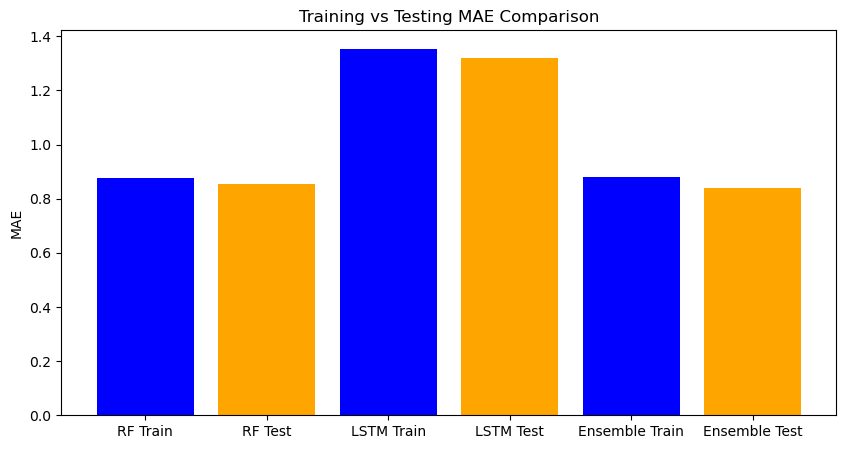

In [167]:
from sklearn.metrics import mean_absolute_error

# 1. Calculate MAE for the Random Forest on the Training Set
mae_train_rf = mean_absolute_error(aligned_y_train[:len(aligned_rf_train_pred)], aligned_rf_train_pred)
print(f"Random Forest Training MAE: {mae_train_rf:.6f}")

# 2. Calculate MAE for the LSTM on the Training Set
mae_train_lstm = mean_absolute_error(aligned_y_train[:len(aligned_lstm_train_pred)], aligned_lstm_train_pred)
print(f"LSTM Training MAE: {mae_train_lstm:.6f}")

# 3. Calculate MAE for the Ensemble on the Training Set
ensemble_train_results_aligned['Ensemble_Weighted'] = (weight_rf * ensemble_train_results_aligned['RandomForest_Predicted']) + \
                                                     (weight_lstm * ensemble_train_results_aligned['LSTM_Predicted'])
y_actual_train_ensemble = ensemble_train_results_aligned['Actual']
y_pred_train_ensemble = ensemble_train_results_aligned['Ensemble_Weighted']
mae_train_ensemble_weighted = mean_absolute_error(y_actual_train_ensemble, y_pred_train_ensemble)
print(f"Ensemble Weighted Training MAE: {mae_train_ensemble_weighted:.6f}")

# 4. Compare with Testing MAEs (Assuming these are already calculated from the earlier steps)
print("\nComparing Training vs Testing MAEs:")

# Testing MAEs (these values should have already been calculated for testing data)
print(f"Random Forest Testing MAE: {mae_rf:.6f}")
print(f"LSTM Testing MAE: {mae_lstm:.6f}")
print(f"Ensemble Weighted Testing MAE: {mae_ensemble_weighted:.6f}")

# 5. Visualize the comparison
plt.figure(figsize=(10, 5))
bar_labels = ['RF Train', 'RF Test', 'LSTM Train', 'LSTM Test', 'Ensemble Train', 'Ensemble Test']
mae_values = [mae_train_rf, mae_rf, mae_train_lstm, mae_lstm, mae_train_ensemble_weighted, mae_ensemble_weighted]

plt.bar(bar_labels, mae_values, color=['blue', 'orange', 'blue', 'orange', 'blue', 'orange'])
plt.title('Training vs Testing MAE Comparison')
plt.ylabel('MAE')
plt.show()

In [169]:
mae_train_ensemble_weighted = mean_absolute_error(y_actual_train_ensemble, y_pred_train_ensemble)
print(f"Ensemble Weighted Training MAE: {mae_train_ensemble_weighted:.6f}")
mae_ensemble_weighted = mean_absolute_error(y_actual_ensemble,y_pred_ensemble)
print(f"Ensemble Weighted Testing MAE: {mae_ensemble_weighted:.6f}")


# Compare training and testing errors
if mae_ensemble_weighted > mae_train_ensemble_weighted :
    print("Weighted Ensembled model may be overfitting.")
else:
    print("weighted Ensembled model generalizes well.")

Ensemble Weighted Training MAE: 0.880653
Ensemble Weighted Testing MAE: 0.841169
weighted Ensembled model generalizes well.
